In [1]:
# linear algebra
import numpy as np

# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd 

from collections import defaultdict

# matplotlib for plotting
import matplotlib.pyplot as plt

# use ggplot style
plt.style.use('ggplot')

# seaborn for beautiful visualizations
import seaborn as sns

# regualar expression
import re

# print inline in this notebook
get_ipython().magic(u'matplotlib inline')

import math

import os

import string

import plotly.graph_objects as go

from matplotlib.patches import ConnectionPatch

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
df_amazon = pd.read_csv('./amazon.csv')
df_facebook = pd.read_csv('./facebook.csv')
df_facebook1 = pd.read_csv('facebook_jobs (1).csv')
df_google = pd.read_csv('./google.csv')

In [3]:
def extract_topk_data(targets_list, words):
    '''
    find the topk frequent data points
    
    :param: targets_list
    :type: list
    :param: words
    :type: list
    
    :return: list
    '''
    assert isinstance(targets_list,list)
    assert isinstance(words,list)
    popularity = dict((x,0) for x in targets_list)
    for word in words:
        if word in popularity:
            popularity[word] += 1
    sorted_popularity = sorted(popularity.items(), key=lambda x: x[1], reverse=True)
    return sorted_popularity

def preferred_programming_languages(panda_read_data):
    '''
    find the topk preferred programming languages
    
    :param: panda_read_data
    :type: dataframe
    
    :return: list
    '''
    assert isinstance(panda_read_data,pd.DataFrame)
    languages = ['swift','matlab','mongodb','hadoop','cosmos', 
                      'mysql','spark', 'pig', 'python', 'java', 
                      'c++', 'php', 'javascript', 'objectivec', 'ruby', 
                      'perl','c','c#']
    qualifications = panda_read_data['PREFERRED QUALIFICATIONS'].tolist()
    words = "".join(re.sub('[·,-/’()]', '', str(v)) for v in qualifications).lower().split(' ')
    return extract_topk_data(languages, words)

def preferred_degrees(panda_read_data):
    '''
    find the topk preferred degrees
    
    :param: panda_read_data
    :type: dataframe
    
    :return: list
    '''
    assert isinstance(panda_read_data,pd.DataFrame)
    degrees = ["Bachelor's", "BS", "PhD", "MS", "Master's"]
    qualifications = panda_read_data['PREFERRED QUALIFICATIONS'].tolist()
    words = "".join(re.sub('[·,-/’()]', '', str(v)) for v in qualifications).split(' ')
    topk = extract_topk_data(degrees, words)
    res = {"Bachelor": 0, "Master": 0, "PhD": 0}
    for (k,v) in topk:
        if k == "BA" or k == "Bachelor's" or k == "BS":
            res["Bachelor"] += v
        elif k == "MS" or k == "Master's":
            res["Master"] += v
        elif k == "PhD":
            res["PhD"] += v
    res = sorted(res.items(), key=lambda x: x[0], reverse=True)
    return res

def preferred_majors(panda_read_data):
    '''
    find the topk preferred majors
    
    :param: panda_read_data
    :type: dataframe
    
    :return: list
    '''
    assert isinstance(panda_read_data,pd.DataFrame)
    majors = ["Computer Science", "Computer Engineering", "CS", "CE", 
              "Electrical Engineering","EE", "MIS", "CIS", "Management Information Systems", 
              "Mathematics", "Computer Information Systems",
              "Math", "Physics" ]
    qualifications = panda_read_data['PREFERRED QUALIFICATIONS'].tolist()
    
    popularity = {"Computer Science":0, "Computer Engineering":0, "Electrical Engineering":0,
                 "Mathematics":0, "Physics":0, "Management Information Systems": 0, "Computer Information Systems":0}
    for qualification in qualifications:
        if type(qualification) is not str:
            continue
        for major in majors:
            if major in qualification:
                if major == "Computer Science" or major == "CS":
                    popularity["Computer Science"] += 1
                elif major == "Computer Engineering" or major == "CE":
                    popularity["Computer Engineering"] += 1
                elif major == "Electrical Engineering" or major == "EE":
                    popularity["Electrical Engineering"] += 1
                elif major == "Management Information Systems" or major == "MIS":
                    popularity["Management Information Systems"] += 1
                elif major == "Computer Information Systems" or major == "CIS":
                    popularity["Computer Information Systems"] += 1
                elif major == "Math" or major == "Mathematics":
                    popularity["Mathematics"] += 1
                elif major == "Physics":
                    popularity["Physics"] += 1              
    return sorted(popularity.items(), key=lambda x: x[1], reverse=True)

In [4]:
def histogram_h(data_name,title,xlabel='Popularity',ylabel='Country', color=None):
    '''
    To create vertical histograms
    
    :param: data_name
    :type: pd.Series
    :param: title
    :type: str
    :param: xlabel
    :type: str
    :param: ylabel
    :type: str
    :param: color
    :type: str
    '''
    assert isinstance(data_name, pd.Series)
    assert isinstance(title, str)
    assert isinstance(xlabel, str)
    assert isinstance(ylabel, str)
    assert isinstance(color, str)
    data_name = data_name[::-1]
    data_name.plot.barh(figsize=(15, 15), color=color)
    plt.title(title, fontsize=27, weight='bold')
    plt.xlabel(xlabel, fontsize=30, weight='bold')
    plt.ylabel(ylabel, fontsize=30, weight='bold')
    plt.yticks(fontsize=24, weight='bold')
    plt.xticks(fontsize=24, weight='bold')
    plt.savefig(title + ".jpeg", bbox_inches = 'tight')
    plt.show()
    
def histogram(data_name,title,ylabel='Popularity',xlabel='Country', color=None):
    '''
    To create horizontal histograms
    
    :param: data_name
    :type: pd.Series
    :param: title
    :type: str
    :param: xlabel
    :type: str
    :param: ylabel
    :type: str
    :param: color
    :type: str
    '''
    assert isinstance(data_name, pd.Series)
    assert isinstance(title, str)
    assert isinstance(xlabel, str)
    assert isinstance(ylabel, str)
    assert isinstance(color, str)
    data_name = data_name[::-1]
    data_name.plot.bar(figsize=(15, 15), color=color)
    plt.title(title, fontsize=27, weight='bold')
    plt.xlabel(xlabel, fontsize=30, weight='bold')
    plt.ylabel(ylabel, fontsize=30, weight='bold')
    plt.yticks(fontsize=24, weight='bold')
    plt.xticks(fontsize=24, weight='bold', rotation=0)
    plt.savefig(title + ".jpeg", bbox_inches = 'tight')
    plt.show()
    
def pie_chart(data_name,title):
    '''
    Create pie chart by matplotlib
    
    :param: data_name
    :type: pd.Series
    :param: title
    :type: str
    '''
    assert isinstance(data_name, pd.Series)
    assert isinstance(title, str)
    explode=[0.03,0.03,0.03]
    plt.figure(figsize=(10,10))
    plt.pie(data_name,autopct='%1.1f%%',explode=explode, textprops={'fontsize':24,'weight': 'bold'})
    plt.title(title, fontsize=25, weight='bold')
    labels = ['{0}'.format(i) for i in data_name.index]
    plt.legend(labels,loc="upper right",bbox_to_anchor=(1.35,0.9),fontsize=20)
    plt.savefig(title + ".jpeg", bbox_inches = 'tight')
    plt.show()

def list_to_series(lst):
    '''
    Convert list to pd.Series
    
    :param: lst
    :type: list
    
    :return: pd.Series
    '''
    assert isinstance(lst, list)
    zlst = list(zip(*lst))
    res = pd.Series(zlst[1], index = zlst[0])
    return res

('MySQL', 50)


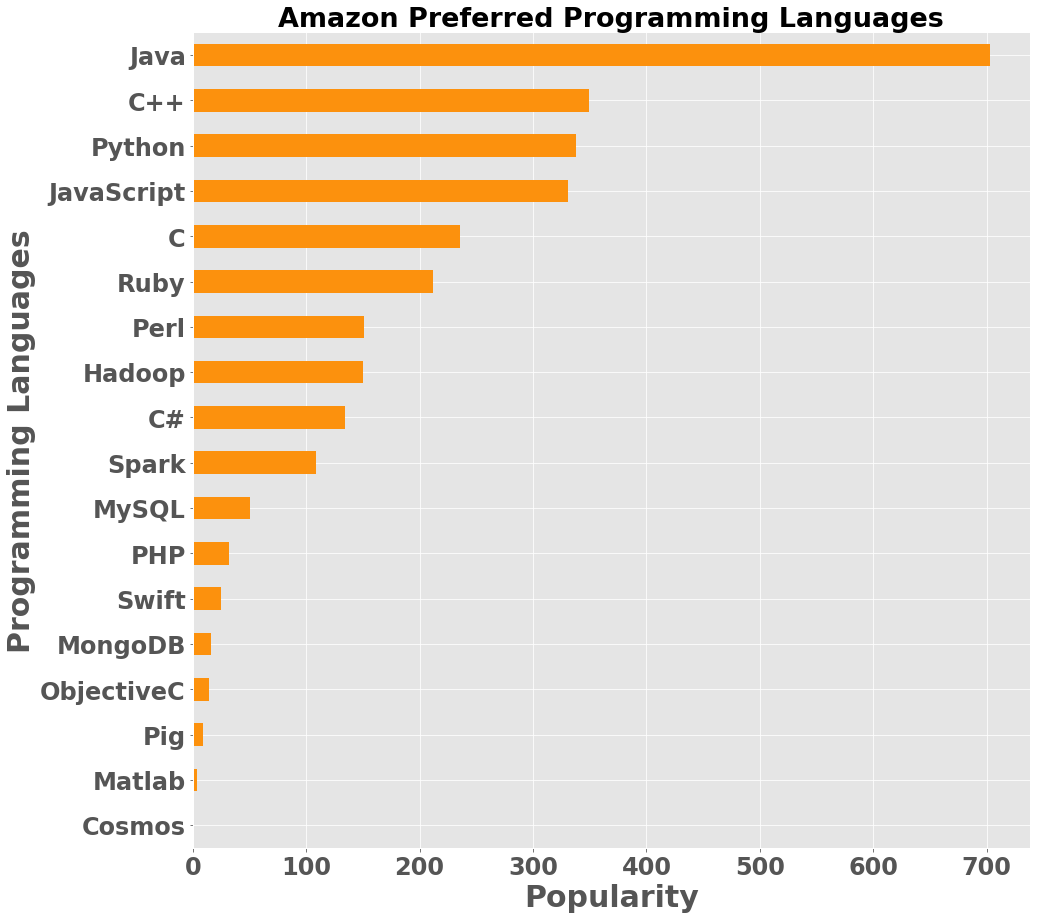

In [5]:
temp = preferred_programming_languages(df_amazon)
languages = [(x.capitalize(), y) for (x,y) in temp]
for (x,y) in languages:
    index = languages.index((x,y))
    if x == 'Mysql':
        languages[index] = ('MySQL', y)
        print(languages[index])
    if x =='Php':
        languages[index] = ('PHP', y)
    if x =='Mongodb':
        languages[index] = ('MongoDB', y)
    if x =='Objectivec':
        languages[index] = ('ObjectiveC', y)
    if x =='Javascript':
        languages[index] = ('JavaScript', y)
histogram_h(list_to_series(languages), 'Amazon Preferred Programming Languages', ylabel='Programming Languages', color='#fc910d')

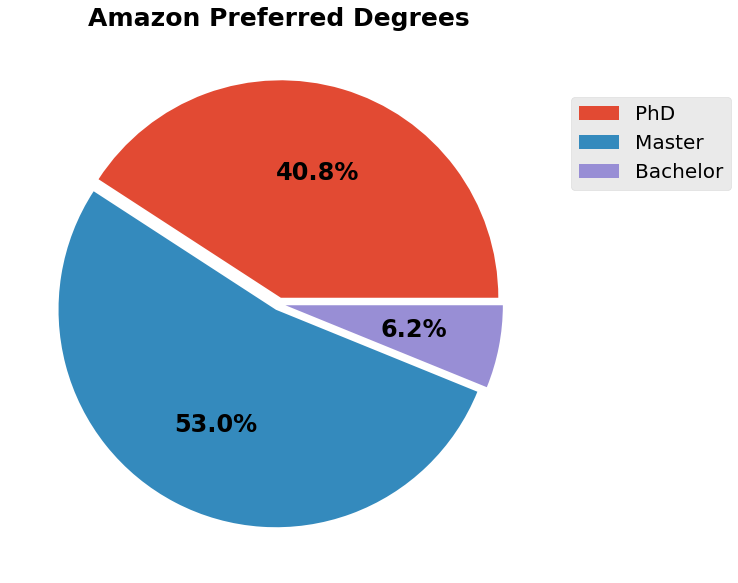

In [6]:
degrees = preferred_degrees(df_amazon)
pie_chart(list_to_series(degrees), 'Amazon Preferred Degrees')

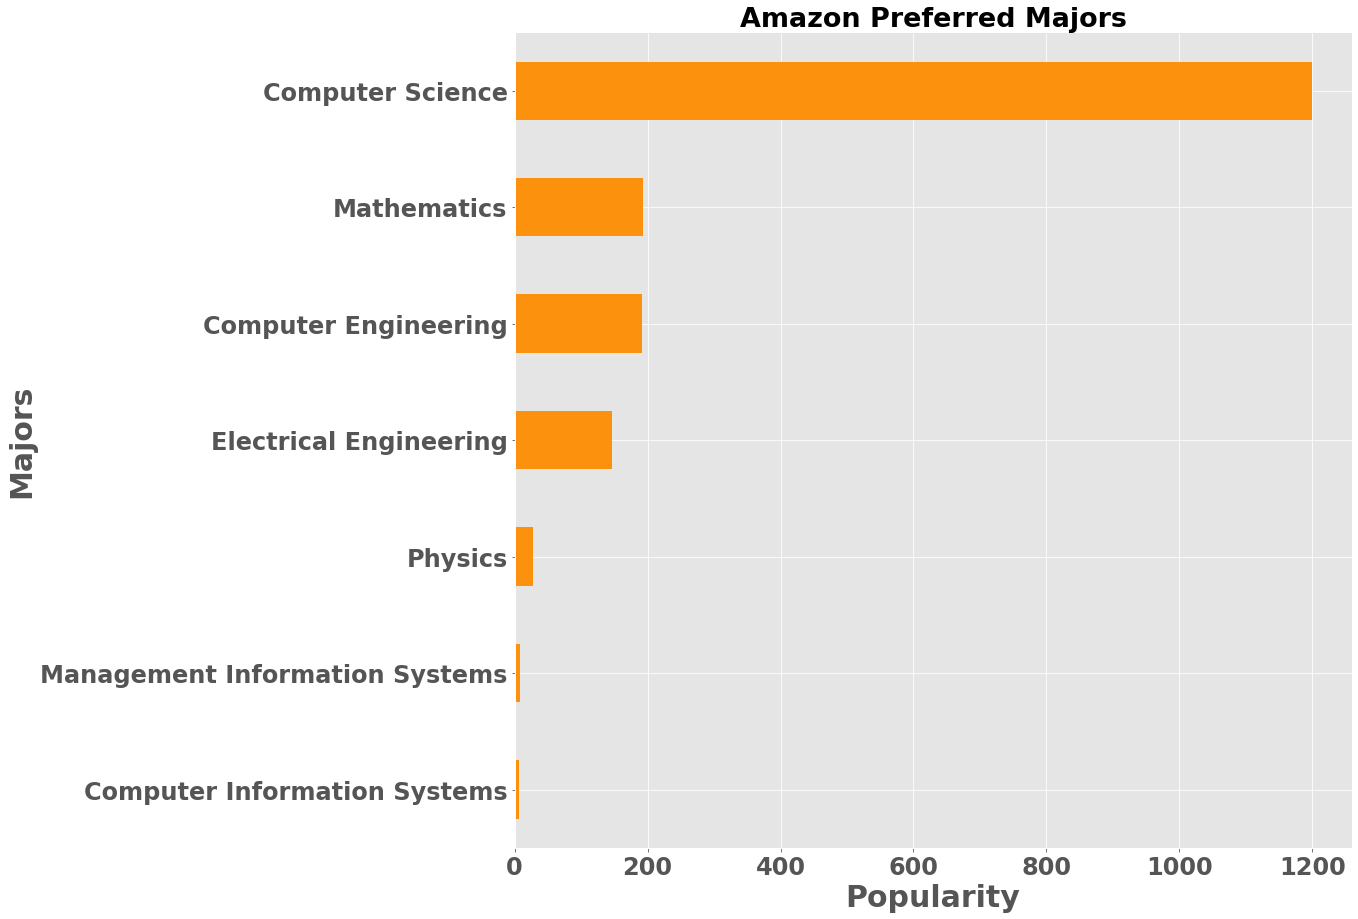

In [7]:
majors = preferred_majors(df_amazon)
histogram_h(list_to_series(majors), 'Amazon Preferred Majors', ylabel='Majors', color='#fc910d')

In [8]:
skills_1 = ['SDN', 'Android', 'Cloud', 'Machine Learning', 'Front-end', 'Back-end', 'Test', 'Deep Learning', 
           'Video', 'Image', 'Distributed Systems', 'User Interface', 'Virtualization', 'Linux', 'Big Data',
           'SaaS', 'PaaS', 'IaaS', 'IOS', 'VPN', 'Chrome', 'Unix', 'Database', 'Visualization', 'Artificial Intelligence',
           'Security', 'GPU programming', 'Container Management', 'Web Development', 'Infrastructure',
           'Advisory Program', 'Data Mining', 'Statistic Analysis', 'Commerce Engine', 'AutoCAD', 'AWS', 'RPM Packaging',
           'AJAX', 'React', 'Kafka', 'Natural Language Processing', 'Embedded', 'Git', 'Dynamo DB', 'Server-less', 'ElasticSearch',
           'API', 'Audio', 'TCP/IP', 'MapReduce', 'Speech Enhancement', 'Data Analytics', 'TensorFlow', 
           'Scikit-Learn', 'FPGA', 'Verilog', 'Web Technology', 'Quantitative Analysis', 'ML', 'Unity', 'Angular', 'Vue',
           'Compiler', 'LLVM', 'GCC', 'Computer Vision', 'NLP', 'AR/VR', 'Server', 'Client', 'Game',
           'Neural Network']
skills_2 = [i.lower() for i in skills_1]
skills = {}
for skill in skills_1:
    count = df_amazon['PREFERRED QUALIFICATIONS'].str.contains(skill).sum()
    skills[skill] = count
for skill in skills_2:
    count = df_amazon['PREFERRED QUALIFICATIONS'].str.contains(skill).sum()
    index = skills_2.index(skill)
    skills[skills_1[index]] += count

remove_list = []    
for skill in skills:
    if skills[skill] == 0:
        remove_list.append(skill)
for skill in remove_list:
    skills.pop(skill)

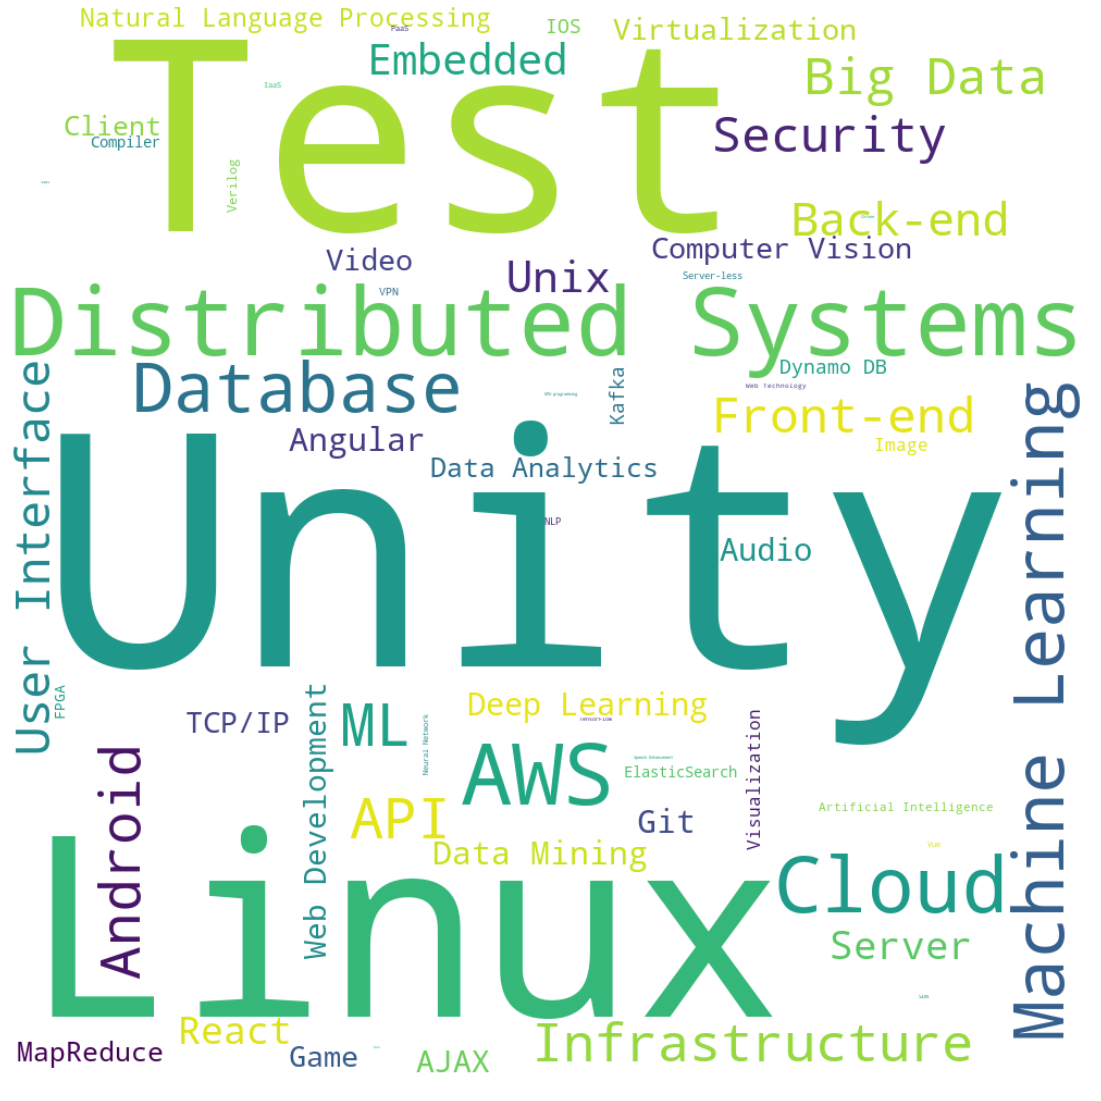

In [9]:
wordcloud = WordCloud(background_color="white",width=1000, height=1000, margin=1).generate_from_frequencies(skills)
# Display the generated image:
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.savefig("amazon_wordcloud.png")
plt.show()

In [10]:
def build_dict(x):
    '''
    Build a dictionary sorted in reverse order of word frequencies
    :param: x
    :type: pd.Series
    :return: dictionary
    '''
    assert isinstance(x,pd.Series)
    word_dict = defaultdict(int)
    stopwords = set(STOPWORDS)
    for i in range(len(x)):
        cur = x[i]
        if(isinstance(cur, str)):
            cur = cur.translate(str.maketrans('','',string.punctuation))
            cur = cur.lower()
            keys = cur.split()
            for key in keys:
                if(key not in stopwords):
                    word_dict[key] += 1
    dict_sorted = {k: v for k, v in sorted(word_dict.items(), key=lambda x: x[1],reverse=True)}
    return dict_sorted

def plot_wordcloud(x, k):
    '''
    Plot the wordcloud graph.
    :param: x, k
    :type: pd.Series, list
    '''
    assert isinstance(x,pd.Series)
    assert isinstance(k,list)
    assert len(k) >= 1
    unremoved = set()
    for i in k:
        unremoved.add(i)
    word_dict = defaultdict(int)
    for i in range(len(x)):
        cur = x[i]
        if(isinstance(cur, str)):
            cur = cur.translate(str.maketrans('','',string.punctuation))
            cur = cur.lower()
            keys = cur.split()
            for key in keys:
                if(key in unremoved):
                    word_dict[key] += 1
    dict_sorted = {k: v for k, v in sorted(word_dict.items(), key=lambda x: x[1],reverse=True)}
    wordcloud = WordCloud(background_color="white", width = 1000, height = 1000).generate_from_frequencies(dict_sorted)
    plt.figure(figsize=(20,20))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [11]:
Google_description = df_google['Preferred Qualifications']
Facebook_description = df_facebook['responsibilities']
Amazon_description = df_amazon['DESCRIPTION']

In [12]:
Google_list = ['experience','management','confident','proactively','decisionmaking','comprehensive','supporting','illustrator','thrive','attitude','multitasking','enthusiasm','responsibility','innovative','credibly','timesensitive','teamwork','manner','competitive','leader','integrity','productive','focused','acumen','multitask','communication','ideas','detailoriented','distinctive','learning','insights','selfmotivated','troubleshooting','networking','interaction','thinker','critical','collaboration','language','selfstarter','passion','flexibility','strategy','judgment','creative','independent','professional','leadership','problemsolving','influence','analytical','understanding','interpersonal','interest','fastpaced']

Facebook_list = ['management','strategic','networking','empathy','professional','manner','rigorous','insights','active','trusted','unique','reliable','articulate','interaction','impactful','proactive','innovation','robust','positive','comprehensive','creative','novel','social','detailed','focused','troubleshooting','critical','sharing','analytical','coordination','competitive','responsible','supporting','contribute','integrity','collaboration','innovative','partnership','efficiency','leadership','experience','understanding','learning','influence','communication','effective']

Amazon_list = ['experience','management','critical','reliability','customerfacing','competitive','interacting','judgment','efficient','thrived','inventive','focused','flexible','collaborative','strategic','fastpaced','networking','robust','groundbreaking','creative','idea','comprehensive','hardworking','understanding','influence','innovative','leadership','support','responsible','unique','passionate']

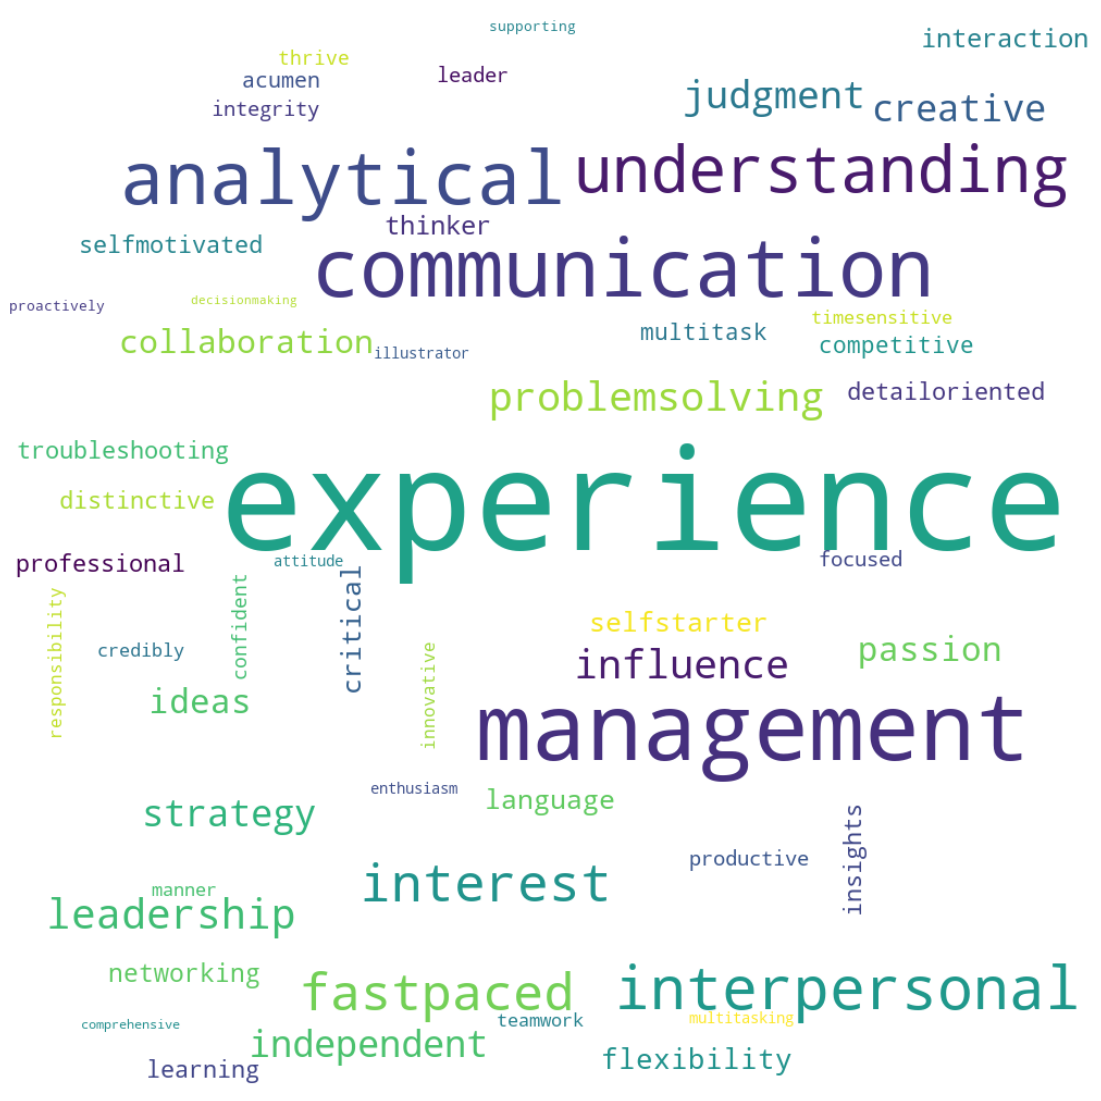

In [13]:
plot_wordcloud(Google_description, Google_list)

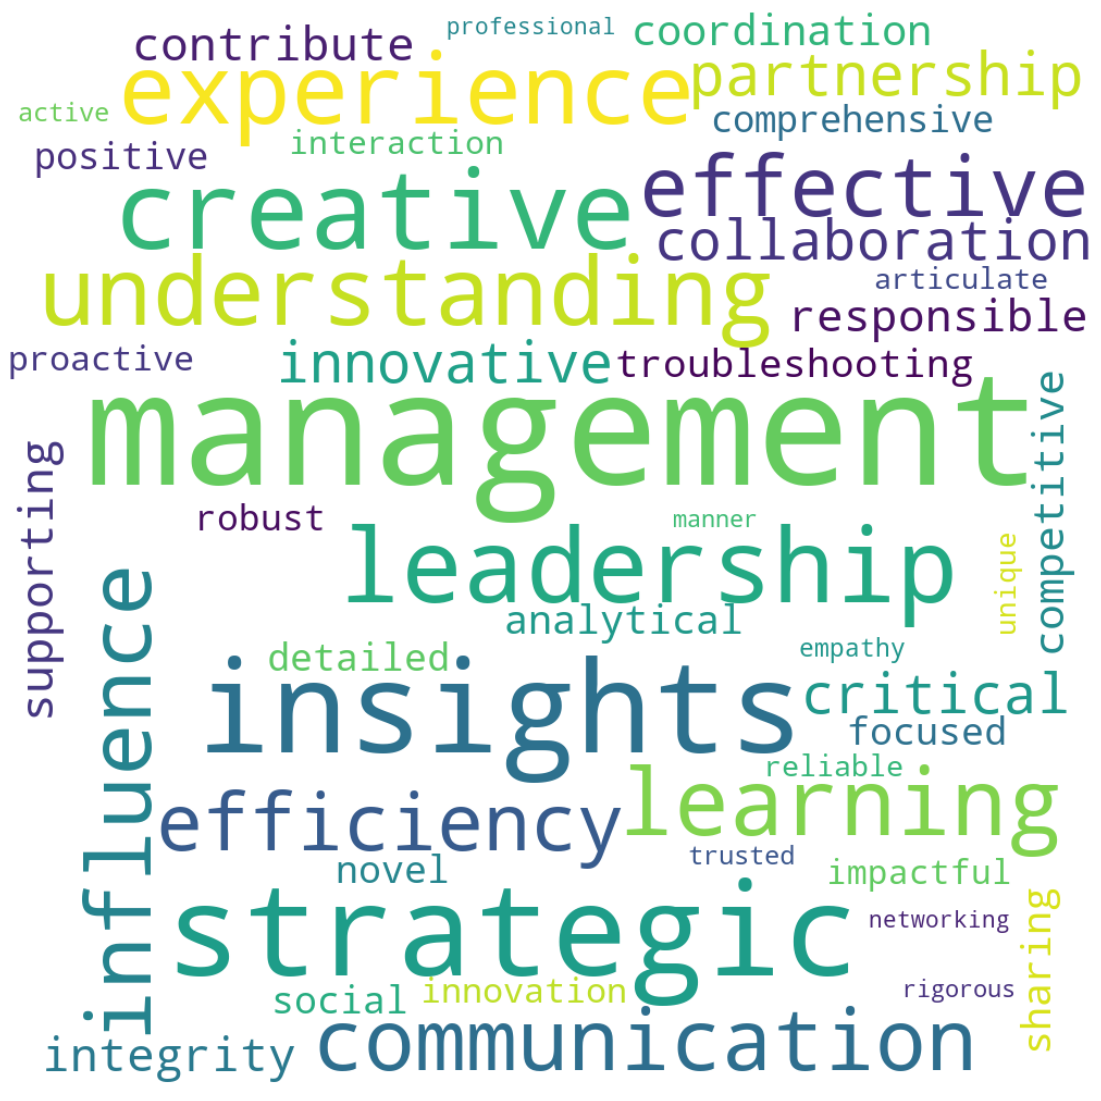

In [14]:
plot_wordcloud(Facebook_description, Facebook_list)

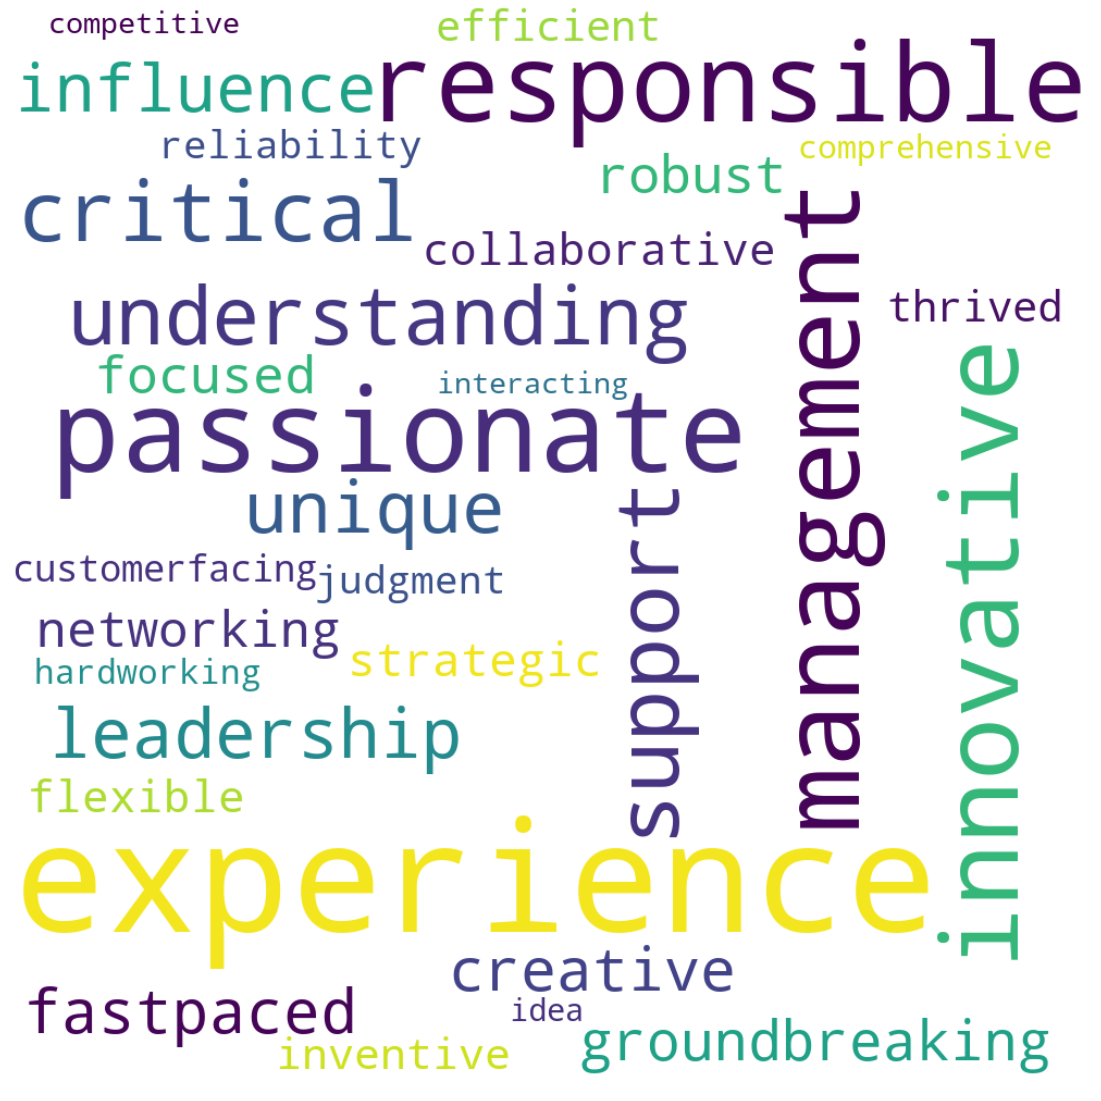

In [15]:
plot_wordcloud(Amazon_description, Amazon_list)

In [16]:
def categories_dis(x):
    '''
    This function finds job categories distribution of amazon and subcategories of software engineer 
    '''
    assert isinstance(x,pd.core.frame.DataFrame)
    s=x
    x=x[x['Category'].str.contains('Software Engineering')] 
    cat={'Machine Learning Engineer':0,'Big Data Engineer':0,'Games Engineer':0,'Web Developer':0,'Network Engineer':0,'Cloud Engineer':0,'Other':0}
    n=x.shape[0]
    print(n)
    cat['Machine Learning Engineer']=s['Title'].str.contains('Machine Learning|Machine|Learning|Deep Learning').sum()   
    cat['Big Data Engineer']=s['Title'].str.contains('Big Data|Data').sum() 
    cat['Network Engineer']=s['Title'].str.contains('Network').sum()    
    
    cat['Web Developer']=s['Title'].str.contains('Web').sum()   
    cat['Software Development Manager']=x['Title'].str.contains('Software Development Manager|Manager').sum()   
    cat['Games Engineer']=s['Title'].str.contains('Game').sum()
    cat['Cloud Engineer']=x['Title'].str.contains('Cloud').sum()
    norm=sum(list(cat.values()))
    print(norm)
    cat['Other']==n-norm
    normalized_dic={nam[0]:nam[1]/500 for nam in cat.items()}
    res = sorted(normalized_dic.items(), key=lambda x: x[1], reverse=True)
    normalized_dic={nam[0]:nam[1] for nam in res}
  
    return cat
    
def amazon_job_graph(amazon):
    ''' 
    This file generates pie chart of all job cateogires of Amazon as well gives bar chart of subcateogires of software engineer
    I used str.contains to generate subcateogries of software developer engineer
    parameter:amazon is dataframe containing job categories 
    type: dataframe
    '''
    assert isinstance(amazon,pd.core.frame.DataFrame)
 
    '''
    Visualization of graphs
    '''
    # style choice
    plt.style.use('fivethirtyeight')

    # make figure and assign axis objects
    fig = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    # pie chart parameters
 
    ratios = [.64, .13, .23]
    labels = ['Software Engineer', 'Software Manager','Others']
    explode=[0.1,0,0]
    # rotate so that first wedge is split by the x-axis
    angle = -180*ratios[0]
    angle = -180*ratios[0]
    wedge_a,labels_a,auto=ax1.pie(ratios, autopct='%1.1f%%', startangle=angle, explode=explode,colors=['r','b','g'],labels=labels )
    plt.setp(labels_a,weight='bold',fontsize=11)
    # bar chart parameters
    #Percentages of different subcatogries                                                                                                                                                                                                                                                nnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnn nnn nnn                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   )
    xpos = 0
    bottom = 0
    ratios = [.18, .15, .12, 0.1,0.09,0.36][::-1]
    width = .2
    colors = ['c','b','#ffcc99','#99ff99','m','y']

    for j in range(len(ratios)):
        height = ratios[j]
        ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
        ypos = bottom + ax2.patches[j].get_height()/2
        bottom += height
        ax2.text(xpos,ypos, "%d%%" %(ax2.patches[j].get_height()*100), ha='center')

    plt.title('Types of Software Engineer',weight='bold')
    plt.legend(('ML Engineer' , 'Web Developer','Big Data Engineer','Cloud Engineer','Network Engineer', 'Other'),fontsize=16,loc='upper right')
    plt.axis('off')
    plt.xlim(-2.5*width, 2.5*width)


    # use ConnectionPatch to draw lines between the two plots
    # get the wedge data for the first group
    theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
    center, r = ax1.patches[0].center, ax1.patches[0].r
    bar_height = sum([item.get_height() for item in ax2.patches])
    x = r*np.cos(math.pi/180*theta2)+center[0]
    y = np.sin(math.pi/180*theta2)+center[1]
    con = ConnectionPatch(xyA=(-width/2,bar_height), xyB=(x,y),
    coordsA="data", coordsB="data", axesA=ax2, axesB=ax1)
    con.set_color([0,0,0])
    con.set_linewidth(4)
    ax2.add_artist(con)

    x = r*np.cos(math.pi/180*theta1)+center[0]
    y = np.sin(math.pi/180*theta1)+center[1]
    con = ConnectionPatch(xyA=(-width/2,0), xyB=(x,y),coordsA="data", coordsB="data", axesA=ax2, axesB=ax1)
    con.set_color([0,0,0])
    ax2.add_artist(con)
    con.set_linewidth(4)

    plt.show()

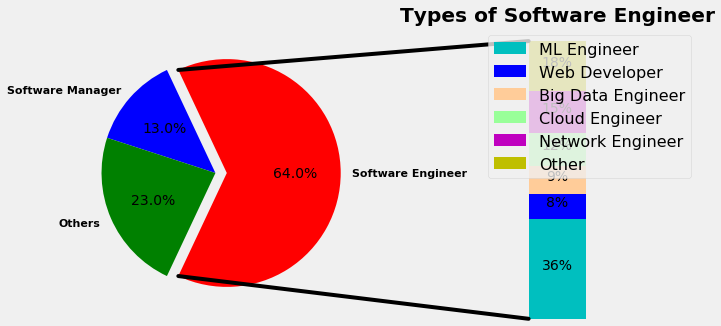

In [17]:
amazon_job_graph(df_amazon)

In [18]:
def amazon_experience(df):
    '''
    Find preferred experience years of Amazon
    
    :param: df
    :type: pd.DataFrame
    
    :return: list
    '''
    assert isinstance(df, pd.DataFrame)
    df['Experience1'] = df['BASIC QUALIFICATIONS'].str.extract(r'([0-9]+) year')
    dff = df[['Experience1','Title']]
    dff = dff.dropna()
    exp = dff.Experience1.value_counts().iloc[:10].sort_values()
    exp_list = list(zip(exp,exp.index))
    exp_list += [(0, '11'), (0, '0'), (0, '12')]
    sorted_exp = sorted(exp_list, key=lambda x: int(x[1]), reverse=True)
    df['Experience2'] = df['BASIC QUALIFICATIONS'].str.extract(r'([0-9]) year')
    dff = df[['Experience2','Title']]
    dff = dff.dropna()
    exp = dff.Experience2.value_counts().iloc[:10].sort_values()
    exp_list = list(zip(exp,exp.index))
    for (count, year) in exp_list: 
        if int(year) <= 12:
            sorted_exp[len(sorted_exp) - int(year) - 1] = (sorted_exp[len(sorted_exp) - int(year) - 1][0] + count, year)
    named_exp = [(y + '+', x) for (x,y) in sorted_exp]
    return named_exp

def google_experience(df):
    '''
    Find preferred experience years of Google
    
    :param: df
    :type: pd.DataFrame
    
    :return: list
    '''
    assert isinstance(df, pd.DataFrame)
    df = df.rename(columns={'Minimum Qualifications': 'Minimum_Qualifications', 
                        'Preferred Qualifications': 'Preferred_Qualifications'})
    pd.isnull(df).sum()
    df = df.dropna(how='any',axis='rows')
    df = df[df.Company == 'Google']
    df['Experience1'] = df['Minimum_Qualifications'].str.extract(r'([0-9]+) year')
    dff = df[['Experience1','Category']]
    dff = dff.dropna()
    exp = dff.Experience1.value_counts().iloc[:10].sort_values()
    exp_list = list(zip(exp,exp.index))
    exp_list += [(0, '9'), (0, '11'), (0, '0')]
    sorted_exp = sorted(exp_list, key=lambda x: int(x[1]), reverse=True)
    df['Experience2'] = df['Minimum_Qualifications'].str.extract(r'([0-9]) year')
    dff = df[['Experience2','Category']]
    dff = dff.dropna()
    exp = dff.Experience2.value_counts().iloc[:10].sort_values()
    exp_list = list(zip(exp,exp.index))
    for (count, year) in exp_list: 
        if int(year) <= 12:
            sorted_exp[len(sorted_exp) - int(year) - 1] = (sorted_exp[len(sorted_exp) - int(year) - 1][0] + count, year)
    named_exp = [(y + '+', x) for (x,y) in sorted_exp]
    return named_exp

def facebook_experience(df):
    '''
    Find preferred experience years of Facebook
    
    :param: df
    :type: pd.DataFrame
    
    :return: list
    '''
    assert isinstance(df, pd.DataFrame)
    df['Experience1'] = df['minimum qualifications'].str.extract(r'([0-9]+)')
    dff = df[['Experience1','title']]
    dff = dff.dropna()
    exp = dff.Experience1.value_counts().iloc[:10].sort_values()
    exp_list = list(zip(exp,exp.index))
    exp_list += [(0, '9'), (0, '11'), (0, '0')]
    sorted_exp = sorted(exp_list, key=lambda x: int(x[1]), reverse=True)
    df['Experience2'] = df['minimum qualifications'].str.extract(r'([0-9]) year')
    dff = df[['Experience2','title']]
    dff = dff.dropna()
    exp = dff.Experience2.value_counts().iloc[:10].sort_values()
    exp_list = list(zip(exp,exp.index))
    for (count, year) in exp_list: 
        if int(year) <= 12:
            sorted_exp[len(sorted_exp) - int(year) - 1] = (sorted_exp[len(sorted_exp) - int(year) - 1][0] + count, year)
    named_exp = [(y + '+', x) for (x,y) in sorted_exp]
    return named_exp

In [19]:
exp_amazon = amazon_experience(df_amazon)
exp_google = google_experience(df_google)
exp_facebook = facebook_experience(df_facebook)
exp_amazon.reverse()
exp_google.reverse()
exp_facebook.reverse()

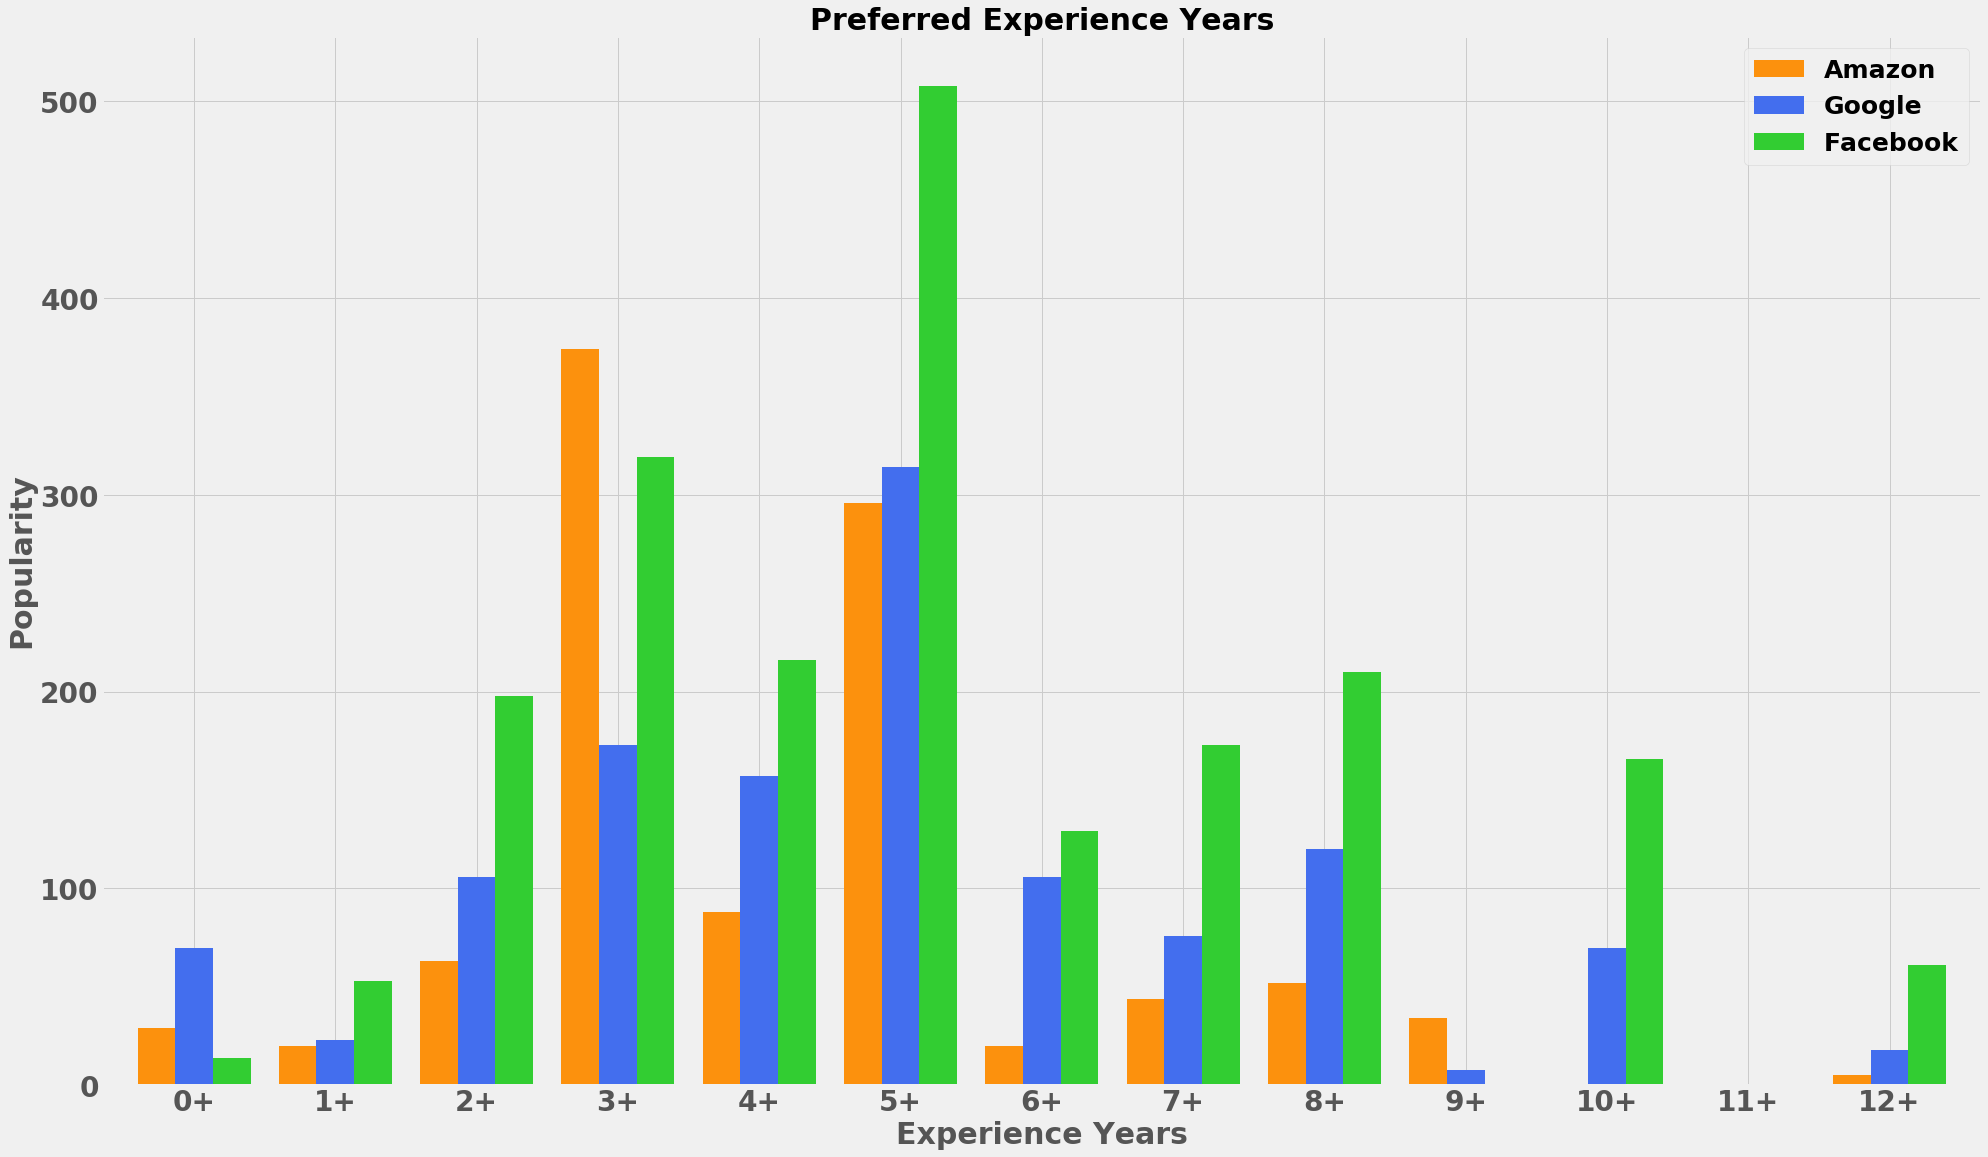

In [20]:
df = pd.DataFrame({'Amazon':[i[1] for i in exp_amazon], 
                           'Google':[i[1] for i in exp_google],
                      'Facebook':[i[1] for i in exp_facebook]}, 
                  index=[i[0] for i in exp_facebook]) 

df.plot.bar(figsize=(30, 18), color=['#fc910d', '#436EEE', '#32CD32'], width=0.8)
plt.legend(prop={'size':25, 'weight':'bold'})
plt.title('Preferred Experience Years', fontsize=30, weight='bold')
plt.xlabel('Experience Years', fontsize=30, weight='bold')
plt.ylabel('Popularity', fontsize=30, weight='bold')
plt.yticks(fontsize=28, weight='bold')
plt.xticks(fontsize=28, weight='bold', rotation=0)
plt.savefig('Preferred Experience Years.jpeg', bbox_inches = 'tight')
plt.show()

12
6
7
9
5
10
13
11
8
[('12+', 61), ('11+', 0), ('10+', 166), ('9+', 0), ('8+', 210), ('7+', 173), ('6+', 129), ('5+', 508), ('4+', 216), ('3+', 319), ('2+', 198), ('1+', 53), ('0+', 14)]


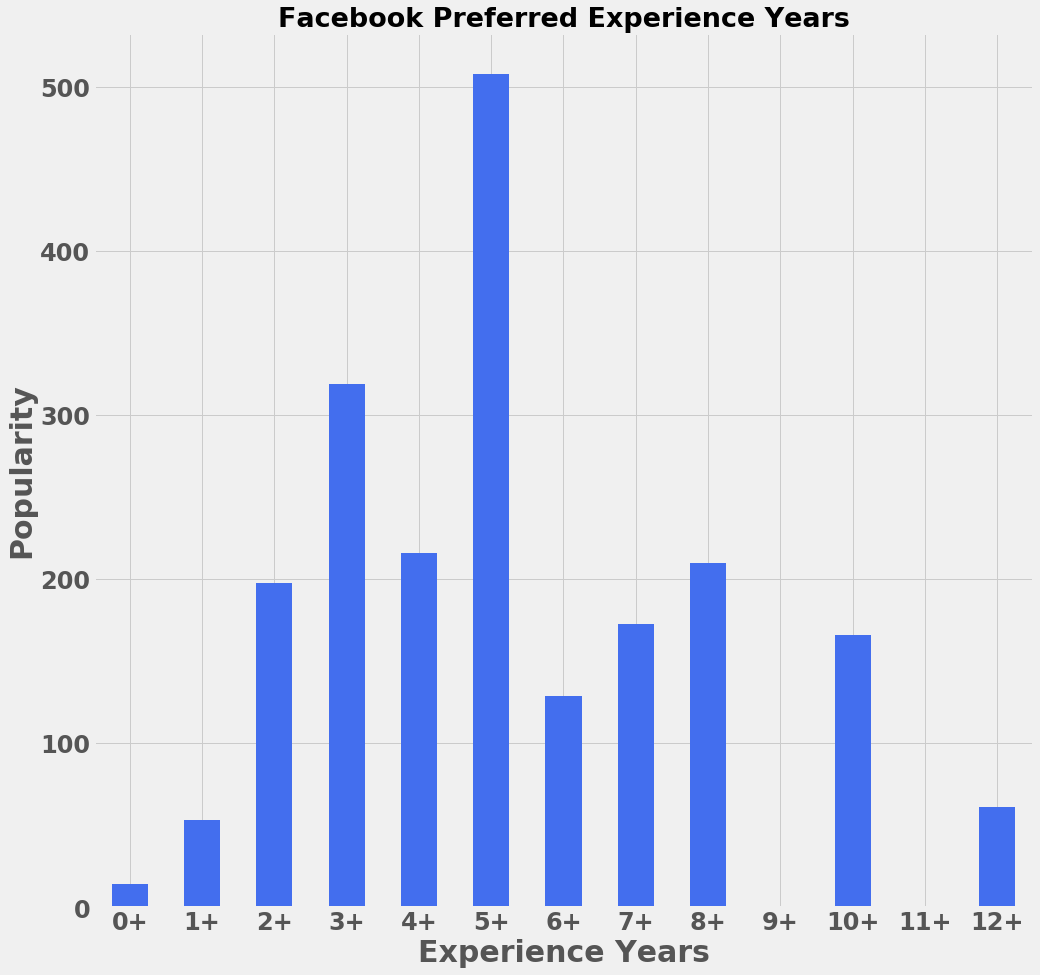

In [21]:
df_facebook['Experience1'] = df_facebook['minimum qualifications'].str.extract(r'([0-9]+)')
dff = df_facebook[['Experience1','title']]
dff = dff.dropna()
exp = dff.Experience1.value_counts().iloc[:10].sort_values()
exp_list = list(zip(exp,exp.index))
exp_list += [(0, '9'), (0, '11'), (0, '0')]
sorted_exp = sorted(exp_list, key=lambda x: int(x[1]), reverse=True)
df_facebook['Experience2'] = df_facebook['minimum qualifications'].str.extract(r'([0-9]) year')
dff = df_facebook[['Experience2','title']]
dff = dff.dropna()
exp = dff.Experience2.value_counts().iloc[:10].sort_values()
exp_list = list(zip(exp,exp.index))
for (count, year) in exp_list: 
    if int(year) <= 12:
        print(len(sorted_exp) - int(year))
        sorted_exp[len(sorted_exp) - int(year) - 1] = (sorted_exp[len(sorted_exp) - int(year) - 1][0] + count, year)
named_exp = [(y + '+', x) for (x,y) in sorted_exp]
print(named_exp)
histogram(list_to_series(named_exp), 'Facebook Preferred Experience Years', xlabel='Experience Years', color='#436EEE')

In [22]:
def extract_topk_data(targets_list, words):
    '''
    find the topk frequent data points
    
    :param: targets_list
    :type: list
    :param: words
    :type: list
    
    :return: list
    '''
    assert isinstance(targets_list,list)
    assert isinstance(words,list)
    popularity = dict((x,0) for x in targets_list)
    for word in words:
        if word in popularity:
            popularity[word] += 1
    sorted_popularity = sorted(popularity.items(), key=lambda x: x[1], reverse=True)
    return sorted_popularity


def preferred_programming_languages(panda_read_data):
    '''
    find the topk preferred programming languages
    
    :param: panda_read_data
    :type: dataframe
    
    :return: list
    '''
    assert isinstance(panda_read_data,pd.DataFrame)
    languages = ['swift','matlab','mongodb','hadoop','cosmos', 
                      'sql','spark', 'pig', 'python', 'java', 
                      'c++', 'php', 'javascript', 'objectivec', 'ruby', 
                      'perl','c','c#']
    qualifications = panda_read_data['minimum qualifications'].tolist()
    words = "".join(re.sub('[·,-/’()]', '', str(v)) for v in qualifications).lower().split(' ')
    return extract_topk_data(languages, words)

def preferred_degrees(panda_read_data):
    '''
    find the topk preferred degrees
    
    :param: panda_read_data
    :type: dataframe
    
    :return: list
    '''
    assert isinstance(panda_read_data,pd.DataFrame)
    degrees = ["BA", "Bachelor", "BS", "PhD", "MS", "Master"]
    qualifications = panda_read_data['minimum qualifications']
    res = {"Bachelor": 0, "Master": 0, "PhD": 0}
    for k in degrees:
        v = qualifications.str.contains(k).sum()
        if k == "BA" or k == "Bachelor" or k == "BS":
            res["Bachelor"] += v
        elif k == "MS" or k == "Master":
            res["Master"] += v
        elif k == "PhD":
            res["PhD"] += v
    res = sorted(res.items(), key=lambda x: x[0], reverse=True)
    return res

def preferred_majors(panda_read_data):
    '''
    find the topk preferred majors
    
    :param: panda_read_data
    :type: dataframe
    
    :return: list
    '''
    assert isinstance(panda_read_data,pd.DataFrame)
    majors = ["Computer Science", "Computer Engineering", "CS", "CE", 
              "Electrical Engineering","EE", "MIS", "CIS", "Management Information Systems", 
              "Mathematics", "Computer Information Systems",
              "Math", "Physics", "Psychology", "psychology", "Business", "business", "Finance", "finance",
             "Account", "account", "Statistics", "statistics", "Marketing", "marketing", "Advertising", "advertising"]
    qualifications = panda_read_data['minimum qualifications'].tolist()
    
    popularity = {"Computer Science":0, "Computer Engineering":0, "Electrical Engineering":0,
                 "Mathematics":0, "Management Information Systems": 0, "Computer Information Systems": 0,
                 "Psychology":0, "Business":0, "Finance":0, "Account":0, "Physics":0, "Statistics":0, "Marketing":0, "Advertising":0}
    for qualification in qualifications:
        if type(qualification) is not str:
            continue
        for major in majors:
            if major in qualification:
                if major == "Computer Science" or major == "CS":
                    popularity["Computer Science"] += 1
                elif major == "Computer Engineering" or major == "CE":
                    popularity["Computer Engineering"] += 1
                elif major == "Electrical Engineering" or major == "EE":
                    popularity["Electrical Engineering"] += 1
                elif major == "Management Information Systems" or major == "MIS":
                    popularity["Management Information Systems"] += 1
                elif major == "Computer Information Systems" or major == "CIS":
                    popularity["Computer Information Systems"] += 1
                elif major == "Math" or major == "Mathematics":
                    popularity["Mathematics"] += 1
                elif major == "Physics":
                    popularity["Physics"] += 1 
                elif major == "Psychology" or major == "psychology":
                    popularity["Psychology"] += 1
                elif major == "Business" or major == "business":
                    popularity["Business"] += 1
                elif major == "Finance" or major == "finance":
                    popularity["Finance"] += 1
                elif major == "Account" or major == "account":
                    popularity["Account"] += 1
                elif major == "Statistics" or major == "statistics":
                    popularity["Statistics"] += 1
                elif major == "Marketing" or major == "marketing":
                    popularity["Marketing"] += 1
                elif major == "Advertising" or major == "advertising":
                    popularity["Advertising"] += 1
    return sorted(popularity.items(), key=lambda x: x[1], reverse=True)

('SQL', 192)


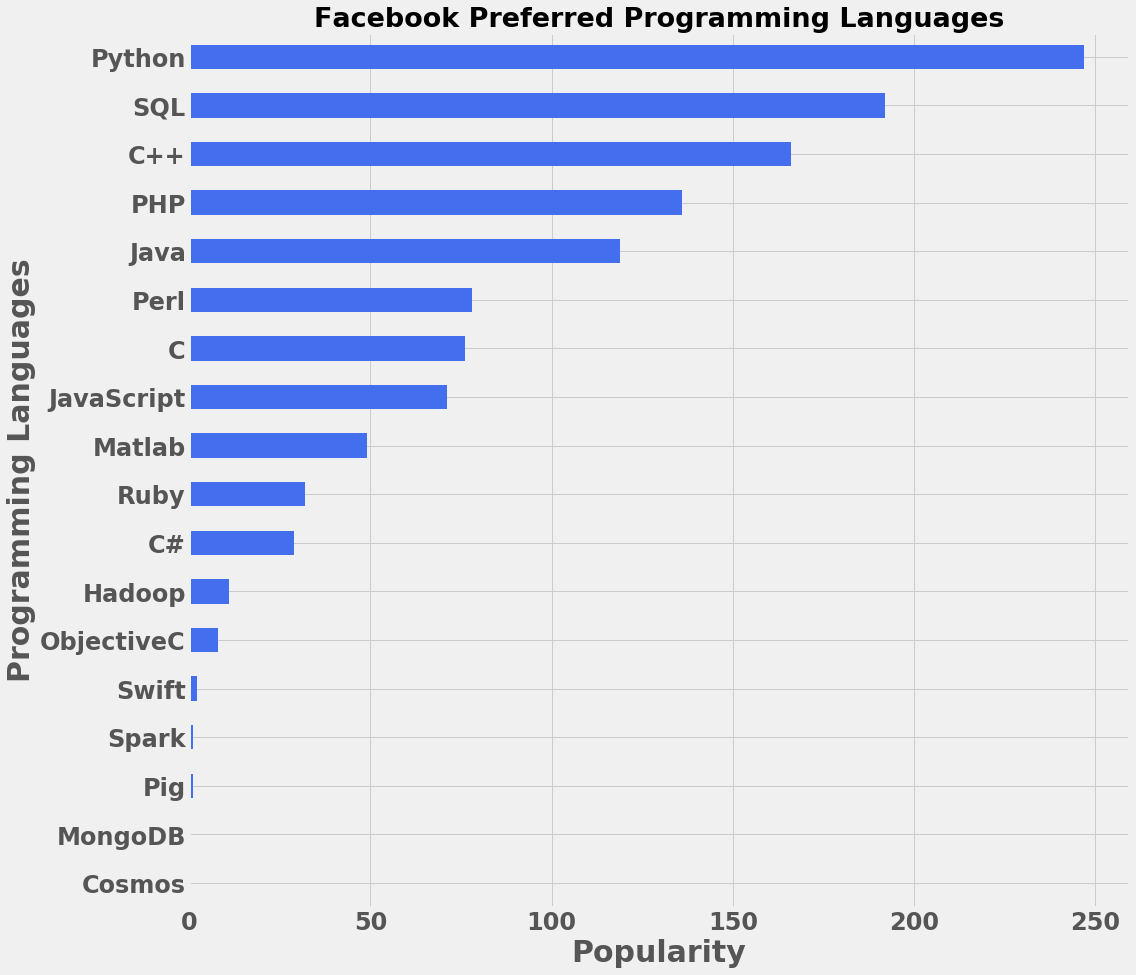

In [23]:
temp = preferred_programming_languages(df_facebook)
languages = [(x.capitalize(), y) for (x,y) in temp]
for (x,y) in languages:
    index = languages.index((x,y))
    if x == 'Sql':
        languages[index] = ('SQL', y)
        print(languages[index])
    if x =='Php':
        languages[index] = ('PHP', y)
    if x =='Mongodb':
        languages[index] = ('MongoDB', y)
    if x =='Objectivec':
        languages[index] = ('ObjectiveC', y)
    if x =='Javascript':
        languages[index] = ('JavaScript', y)
histogram_h(list_to_series(languages), 'Facebook Preferred Programming Languages', ylabel='Programming Languages', color='#436EEE')

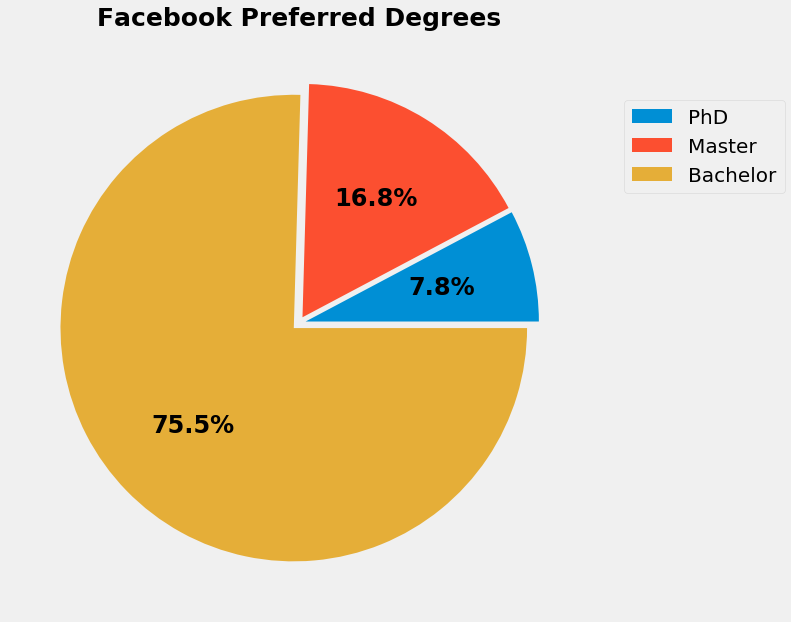

In [24]:
degrees = preferred_degrees(df_facebook)
pie_chart(list_to_series(degrees), 'Facebook Preferred Degrees')

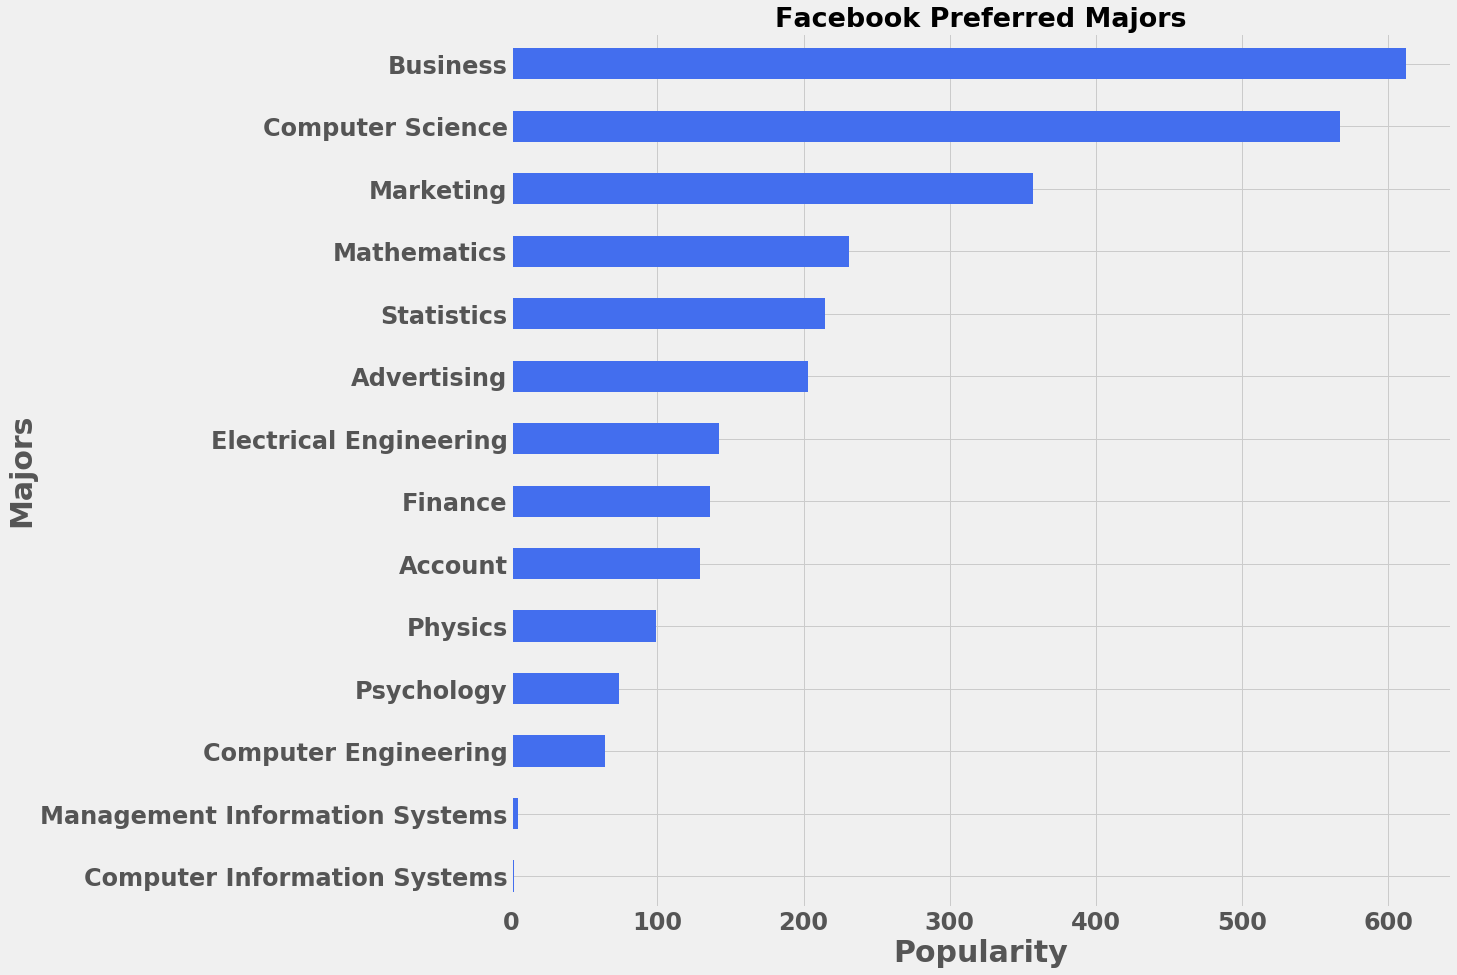

In [25]:
majors = preferred_majors(df_facebook)
histogram_h(list_to_series(majors), 'Facebook Preferred Majors', ylabel='Majors', color='#436EEE')

In [26]:
skills_1 = ['SDN', 'Android', 'Cloud', 'Machine Learning', 'Front-end', 'Back-end', 'Test', 'Deep Learning', 
           'Video', 'Image', 'Distributed Systems', 'User Interface', 'Virtualization', 'Linux', 'Big Data',
           'SaaS', 'PaaS', 'IaaS', 'IOS', 'VPN', 'Chrome', 'Unix', 'Database', 'Visualization', 'Artificial Intelligence',
           'Security', 'GPU programming', 'Container Management', 'Web Development', 'Infrastructure',
           'Advisory Program', 'Data Mining', 'Statistic Analysis', 'Commerce Engine', 'AutoCAD', 'AWS', 'RPM Packaging',
           'AJAX', 'React', 'Kafka', 'Natural Language Processing', 'Embedded', 'Git', 'Dynamo DB', 'Server-less', 'ElasticSearch',
           'API', 'Audio', 'TCP/IP', 'MapReduce', 'Speech Enhancement', 'Data Analytics', 'TensorFlow', 
           'Scikit-Learn', 'FPGA', 'Verilog', 'Web Technology', 'Quantitative Analysis', 'ML', 'Unity', 'Angular', 'Vue',
           'Compiler', 'LLVM', 'GCC', 'Computer Vision', 'NLP', 'AR/VR', 'Server', 'Client', 'Game',
           'Neural Network']
skills_2 = [i.lower() for i in skills_1]
skills = {}
for skill in skills_1:
    count = df_facebook['minimum qualifications'].str.contains(skill).sum()
    skills[skill] = count
for skill in skills_2:
    count = df_facebook['minimum qualifications'].str.contains(skill).sum()
    index = skills_2.index(skill)
    skills[skills_1[index]] += count

remove_list = []    
for skill in skills:
    if skills[skill] == 0:
        remove_list.append(skill)
for skill in remove_list:
    skills.pop(skill)

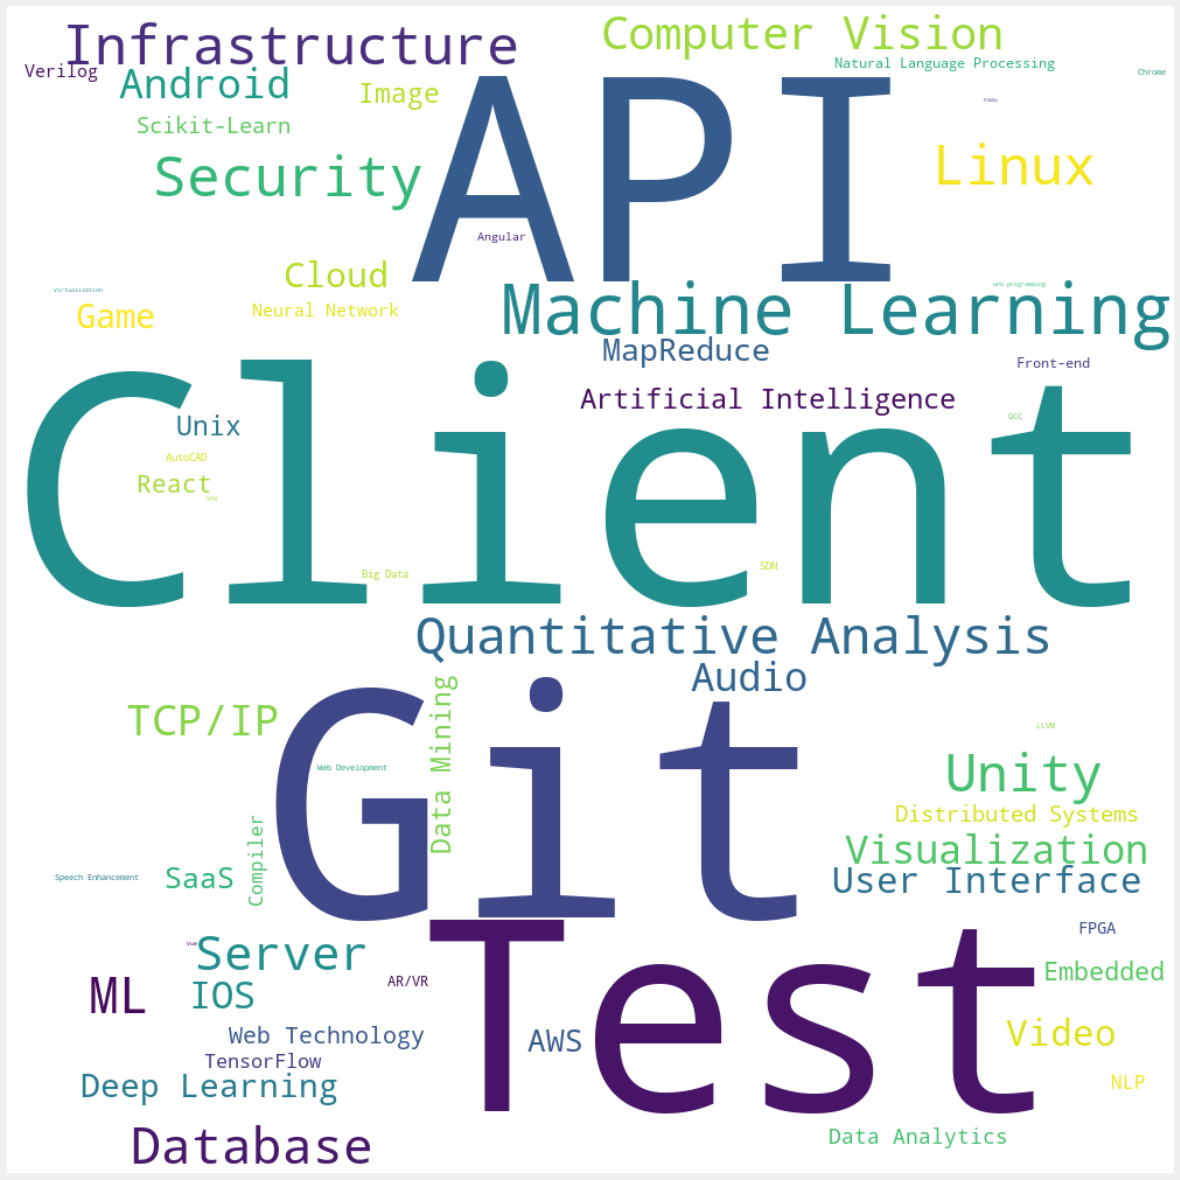

In [27]:
wordcloud = WordCloud(background_color="white",width=1000, height=1000, margin=0).generate_from_frequencies(skills)
# Display the generated image:
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.savefig("facebook_wordcloud.png")
plt.show()

In [28]:
def facebook_job_graph(facebook):
    ''' 
    This file generates pie chart of all job cateogires of Facebook as well gives bar chart of subcateogires of software engineer
    I used str.contains to generate subcateogries of software developer engineer
    parameter:facebook is dataframe containing job categories 
    type: dataframe
    '''
    assert isinstance(facebook,pd.core.frame.DataFrame)
 
    z=facebook['Category'].value_counts()
    s=sum([z['Artificial Intelligence'],z['Software Engineering'],z['Data Center Design and Construction'],
    z['Data & Analytics'],z['Data Center Strategy and Development'],z['IT'],z['Network Engineering']])
    s=s+sum([z['Database, Storage, Systems Engineering'],z['Analytics'],z['Machine Learning'],z['Data Center Design and Construction']])
    s=s+facebook['Category'].str.contains('Data').sum()
    total=facebook.shape[0]
    s=s/total
    f1=z['AR/VR']/total

    f3=facebook['Category'].str.contains('Legal|Finance').sum()/total
    f4=facebook['Category'].str.contains('Marketing|People|Public|HR|Customer|Media|Communications').sum()/total
    f5=facebook['Category'].str.contains('Management|Account|Sales|Monetization|Business|Payments').sum()/total
    other=1-s-f1-f3-f4-f5   

    d=facebook 
    x1=d[d['Category'].str.contains('Software Engineering|Data|Machine Learning|Artificial Intelligence|Database|Network|IT|Analytics')] 
    cat={'Machine Learning Engineer':0,'Big Data Engineer':0,'Artificial Intelligence':0,'Network Engineer':0,'Database Engineer':0,'Other':0}
    n=x1.shape[0]
    cat['Machine Learning Engineer']=x1['Title'].str.contains('Machine Learning|Machine|Learning|Deep Learning').sum()/n
    cat['Big Data Engineer']=x1['Title'].str.contains('Big Data|Data').sum()/n
    cat['Network Engineer']=x1['Title'].str.contains('Network').sum()/n  
    
    cat['IT Engineer']=x1['Category'].str.contains('IT').sum()/n  
    #cat['Software Development Manager']=x['Title'].str.contains('Software Development Manager|Manager').sum()   
    cat['Artificial Intelligence']=x1['Category'].str.contains('Artificial').sum()/n
    cat['Database Engineer']=x1['Category'].str.contains('Database|Storage').sum()/n
    norm=sum(list(cat.values()))
    print(norm)
    cat['Other']==n-norm
    normalized_dic={nam[0]:nam[1]/500 for nam in cat.items()}
    res = sorted(normalized_dic.items(), key=lambda x: x[1], reverse=True)
    normalized_dic={nam[0]:nam[1] for nam in res}
  

    '''
    Visualization of graphs
    '''
    # style choice
    plt.style.use('fivethirtyeight')

    # make figure and assign axis objects
    fig = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)

    # pie chart parameters
    ratios = [s, f1, f3,f4,f5,other]
    labels = ['Software Engineer', 'Global Operations', 'Legal & Finance','Marketing and Communication','Sales &Account Manager','Other']
    explode=[0.1,0,0,0,0,0]
    # rotate so that first wedge is split by the x-axis
    angle = -180*ratios[0]
    angle = -180*ratios[0]
    wedge_a,labels_a,auto=ax1.pie(ratios, autopct='%1.1f%%', startangle=angle, explode=explode,colors=['r','hotpink','m','cadetblue','olive','g'],labels=labels )
    plt.setp(labels_a,weight='bold',fontsize=11)
    # bar chart parameters
    #Percentages of different subcatogries
    #plt.setp(labels_a,weight='bold',fontsize=14)                                                                                                                                                                                                                                                 nnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnn nnn nnn                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   )
    xpos = 0
    bottom = 0
    ratios = [.28, 0.20,.12, .05,0.04,0.3][::-1]
    width = .2
    colors = ['#ffcc99','slategrey','c','m','plum','y'][::-1]

    for j in range(len(ratios)):
        height = ratios[j]
        ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
        ypos = bottom + ax2.patches[j].get_height()/2
        bottom += height
        ax2.text(xpos,ypos, "%d%%" %(ax2.patches[j].get_height()*100), ha='center')

    plt.title('Types of Software Engineer',weight='bold')
    plt.legend(('Big Data' , 'Cloud Engineer','Machine Learning','Network Engineer','IT Engineer','Other'),fontsize=16,loc='upper right')
    plt.axis('off')
    plt.xlim(-2.5*width, 2.5*width)


    # use ConnectionPatch to draw lines between the two plots
    # get the wedge data for the first group
    theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
    center, r = ax1.patches[0].center, ax1.patches[0].r
    bar_height = sum([item.get_height() for item in ax2.patches])
    x = r*np.cos(math.pi/180*theta2)+center[0]
    y = np.sin(math.pi/180*theta2)+center[1]
    con = ConnectionPatch(xyA=(-width/2,bar_height), xyB=(x,y), coordsA="data", coordsB="data", axesA=ax2, axesB=ax1)
    con.set_color([0,0,0])
    con.set_linewidth(4)
    ax2.add_artist(con)

    x = r*np.cos(math.pi/180*theta1)+center[0]
    y = np.sin(math.pi/180*theta1)+center[1]
    con = ConnectionPatch(xyA=(-width/2,0), xyB=(x,y), coordsA="data", coordsB="data", axesA=ax2, axesB=ax1)
    con.set_color([0,0,0])
    ax2.add_artist(con)
    con.set_linewidth(4)

    plt.show()

0.5669291338582678


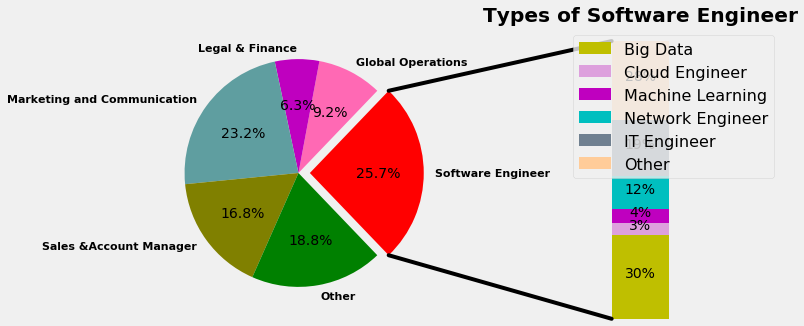

In [29]:
facebook_job_graph(df_facebook1)

In [30]:
df_google = df_google.rename(columns={'Minimum Qualifications': 'Minimum_Qualifications', 
                        'Preferred Qualifications': 'Preferred_Qualifications'})
pd.isnull(df_google).sum()
df_google = df_google.dropna(how='any',axis='rows')
df_google = df_google[df_google.Company == 'Google']

In [31]:
def extract_topk_data(targets_list, words):
    '''
    find the topk frequent data points
    
    :param: targets_list
    :type: list
    :param: words
    :type: list
    
    :return: list
    '''
    assert isinstance(targets_list,list)
    assert isinstance(words,list)
    popularity = dict((x,0) for x in targets_list)
    for word in words:
        if word in popularity:
            popularity[word] += 1
    sorted_popularity = sorted(popularity.items(), key=lambda x: x[1], reverse=True)
    return sorted_popularity


def preferred_programming_languages(panda_read_data):
    '''
    find the topk preferred programming languages
    
    :param: panda_read_data
    :type: dataframe
    
    :return: list
    '''
    assert isinstance(panda_read_data,pd.DataFrame)
    languages = ['swift','matlab','mongodb','hadoop','cosmos', 
                      'sql','spark', 'pig', 'python', 'java', 
                      'c++', 'php', 'javascript', 'objectivec', 'ruby', 
                      'perl','c','c#']
    qualifications = panda_read_data['Preferred_Qualifications'].tolist()
    words = "".join(re.sub('[·,-/’()]', '', str(v)) for v in qualifications).lower().split(' ')
    return extract_topk_data(languages, words)

def preferred_degrees(panda_read_data):
    '''
    find the topk preferred degrees
    
    :param: panda_read_data
    :type: dataframe
    
    :return: list
    '''
    assert isinstance(panda_read_data,pd.DataFrame)
    degrees = ["BA", "Bachelor", "BS", "PhD", "MS", "Master"]
    qualifications = panda_read_data['Preferred_Qualifications']
    res = {"Bachelor": 0, "Master": 0, "PhD": 0}
    for k in degrees:
        v = qualifications.str.contains(k).sum()
        if k == "BA" or k == "Bachelor" or k == "BS":
            res["Bachelor"] += v
        elif k == "MS" or k == "Master":
            res["Master"] += v
        elif k == "PhD":
            res["PhD"] += v
    res = sorted(res.items(), key=lambda x: x[0], reverse=True)
    return res

def preferred_majors(panda_read_data):
    '''
    find the topk preferred majors
    
    :param: panda_read_data
    :type: dataframe
    
    :return: list
    '''
    assert isinstance(panda_read_data,pd.DataFrame)
    majors = ["Computer Science", "Computer Engineering", "CS", "CE", 
              "Electrical Engineering","EE", "MIS", "CIS", "Management Information Systems", 
              "Mathematics", "Computer Information Systems",
              "Math", "Physics", "Psychology", "psychology", "Business", "business", "Finance", "finance",
             "Account", "account", "Statistics", "statistics", "Marketing", "marketing", "Advertising", "advertising"]
    qualifications = panda_read_data['Preferred_Qualifications'].tolist()
    
    popularity = {"Computer Science":0, "Computer Engineering":0, "Electrical Engineering":0,
                 "Mathematics":0, "Management Information Systems": 0, "Computer Information Systems": 0,
                 "Psychology":0, "Business":0, "Finance":0, "Account":0, "Statistics":0, "Marketing":0, "Advertising":0}
    for qualification in qualifications:
        if type(qualification) is not str:
            continue
        for major in majors:
            if major in qualification:
                if major == "Computer Science" or major == "CS":
                    popularity["Computer Science"] += 1
                elif major == "Computer Engineering" or major == "CE":
                    popularity["Computer Engineering"] += 1
                elif major == "Electrical Engineering" or major == "EE":
                    popularity["Electrical Engineering"] += 1
                elif major == "Management Information Systems" or major == "MIS":
                    popularity["Management Information Systems"] += 1
                elif major == "Computer Information Systems" or major == "CIS":
                    popularity["Computer Information Systems"] += 1
                elif major == "Math" or major == "Mathematics":
                    popularity["Mathematics"] += 1
                elif major == "Physics":
                    popularity["Physics"] += 1 
                elif major == "Psychology" or major == "psychology":
                    popularity["Psychology"] += 1
                elif major == "Business" or major == "business":
                    popularity["Business"] += 1
                elif major == "Finance" or major == "finance":
                    popularity["Finance"] += 1
                elif major == "Account" or major == "account":
                    popularity["Account"] += 1
                elif major == "Statistics" or major == "statistics":
                    popularity["Statistics"] += 1
                elif major == "Marketing" or major == "marketing":
                    popularity["Marketing"] += 1
                elif major == "Advertising" or major == "advertising":
                    popularity["Advertising"] += 1
    return sorted(popularity.items(), key=lambda x: x[1], reverse=True)

In [32]:
preferred_programming_languages(df_google)

[('python', 63),
 ('javascript', 53),
 ('sql', 45),
 ('java', 44),
 ('php', 19),
 ('c++', 14),
 ('perl', 9),
 ('c', 9),
 ('spark', 6),
 ('c#', 6),
 ('mongodb', 5),
 ('objectivec', 5),
 ('ruby', 5),
 ('hadoop', 4),
 ('matlab', 3),
 ('swift', 0),
 ('cosmos', 0),
 ('pig', 0)]

In [33]:
def histogram_h(data_name,title,xlabel='Popularity',ylabel='Country', color=None):
    '''
    To create vertical histograms
    
    :param: data_name
    :type: pd.Series
    :param: title
    :type: str
    :param: xlabel
    :type: str
    :param: ylabel
    :type: str
    :param: color
    :type: str
    '''
    assert isinstance(data_name, pd.Series)
    assert isinstance(title, str)
    assert isinstance(xlabel, str)
    assert isinstance(ylabel, str)
    assert isinstance(color, str)
    data_name = data_name[::-1]
    data_name.plot.barh(figsize=(15, 15), color=color)
    plt.title(title, fontsize=27, weight='bold')
    plt.xlabel(xlabel, fontsize=30, weight='bold')
    plt.ylabel(ylabel, fontsize=30, weight='bold')
    plt.yticks(fontsize=24, weight='bold')
    plt.xticks(fontsize=24, weight='bold')
    plt.savefig(title + ".jpeg", bbox_inches = 'tight')
    plt.show()
    
def histogram(data_name,title,ylabel='Popularity',xlabel='Country', color=None):
    '''
    To create horizontal histograms
    
    :param: data_name
    :type: pd.Series
    :param: title
    :type: str
    :param: xlabel
    :type: str
    :param: ylabel
    :type: str
    :param: color
    :type: str
    '''
    assert isinstance(data_name, pd.Series)
    assert isinstance(title, str)
    assert isinstance(xlabel, str)
    assert isinstance(ylabel, str)
    assert isinstance(color, str)
    data_name = data_name[::-1]
    data_name.plot.bar(figsize=(15, 15), color=color)
    plt.title(title, fontsize=27, weight='bold')
    plt.xlabel(xlabel, fontsize=30, weight='bold')
    plt.ylabel(ylabel, fontsize=30, weight='bold')
    plt.yticks(fontsize=24, weight='bold')
    plt.xticks(fontsize=24, weight='bold', rotation=0)
    plt.savefig(title + ".jpeg", bbox_inches = 'tight')
    plt.show()
    
def pie_chart(data_name,title):
    '''
    Create pie chart by matplotlib
    
    :param: data_name
    :type: pd.Series
    :param: title
    :type: str
    '''
    assert isinstance(data_name, pd.Series)
    assert isinstance(title, str)
    explode=[0.03,0.03,0.03]
    plt.figure(figsize=(10,10))
    plt.pie(data_name,autopct='%1.1f%%',explode=explode, textprops={'fontsize':24,'weight': 'bold'})
    plt.title(title, fontsize=25, weight='bold')
    labels = ['{0}'.format(i) for i in data_name.index]
    plt.legend(labels,loc="upper right",bbox_to_anchor=(1.35,0.9),fontsize=20)
    plt.savefig(title + ".jpeg", bbox_inches = 'tight')
    plt.show()

def list_to_series(lst):
    '''
    Convert list to pd.Series
    
    :param: lst
    :type: list
    
    :return: pd.Series
    '''
    assert isinstance(lst, list)
    zlst = list(zip(*lst))
    res = pd.Series(zlst[1], index = zlst[0])
    return res

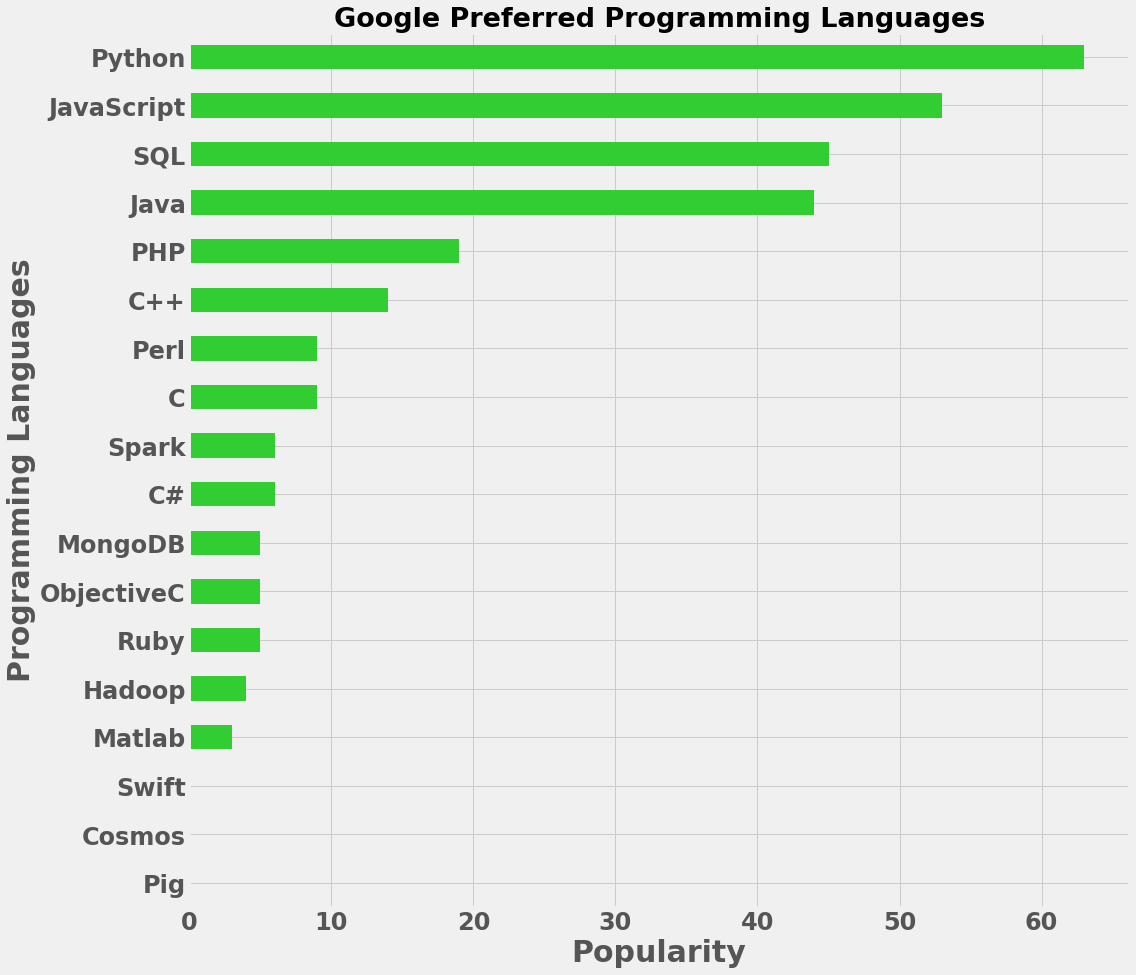

In [34]:
temp = preferred_programming_languages(df_google)
languages = [(x.capitalize(), y) for (x,y) in temp]
for (x,y) in languages:
    index = languages.index((x,y))
    if x == 'Sql':
        languages[index] = ('SQL', y)
    if x =='Php':
        languages[index] = ('PHP', y)
    if x =='Mongodb':
        languages[index] = ('MongoDB', y)
    if x =='Objectivec':
        languages[index] = ('ObjectiveC', y)
    if x =='Javascript':
        languages[index] = ('JavaScript', y)
histogram_h(list_to_series(languages), 'Google Preferred Programming Languages', ylabel='Programming Languages', color='#32CD32')

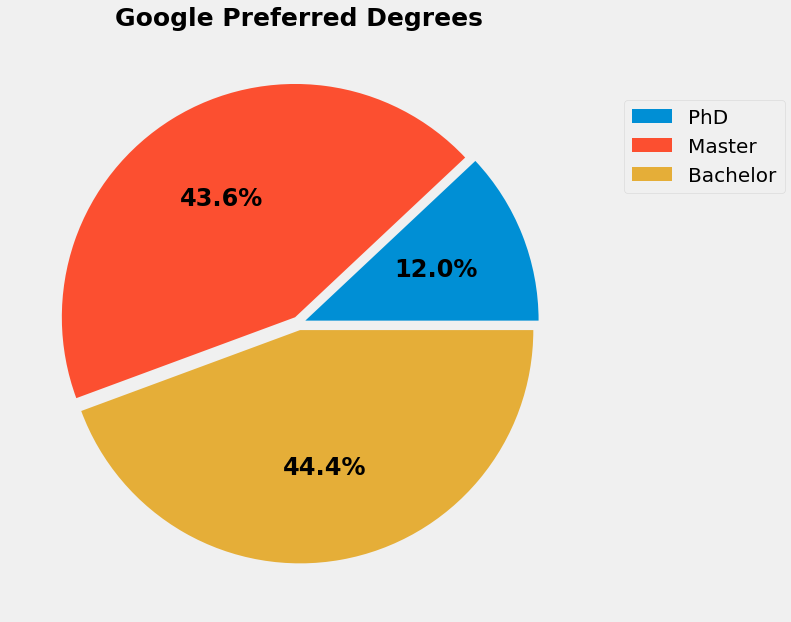

In [35]:
degrees = preferred_degrees(df_google)
pie_chart(list_to_series(degrees), 'Google Preferred Degrees')

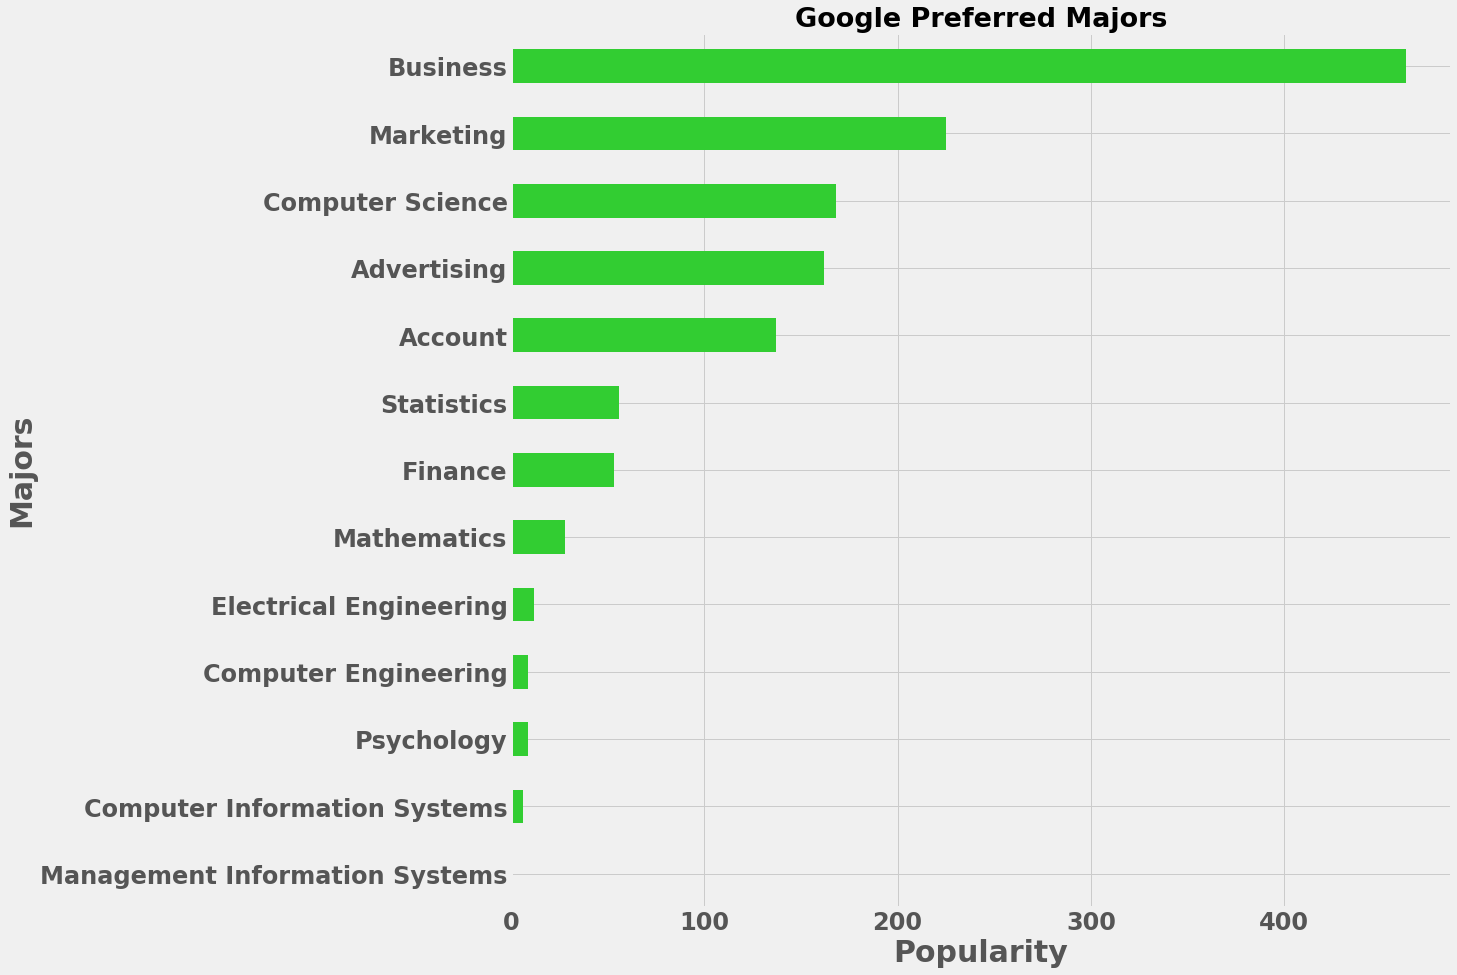

In [36]:
majors = preferred_majors(df_google)
histogram_h(list_to_series(majors), 'Google Preferred Majors', ylabel='Majors', color='#32CD32')

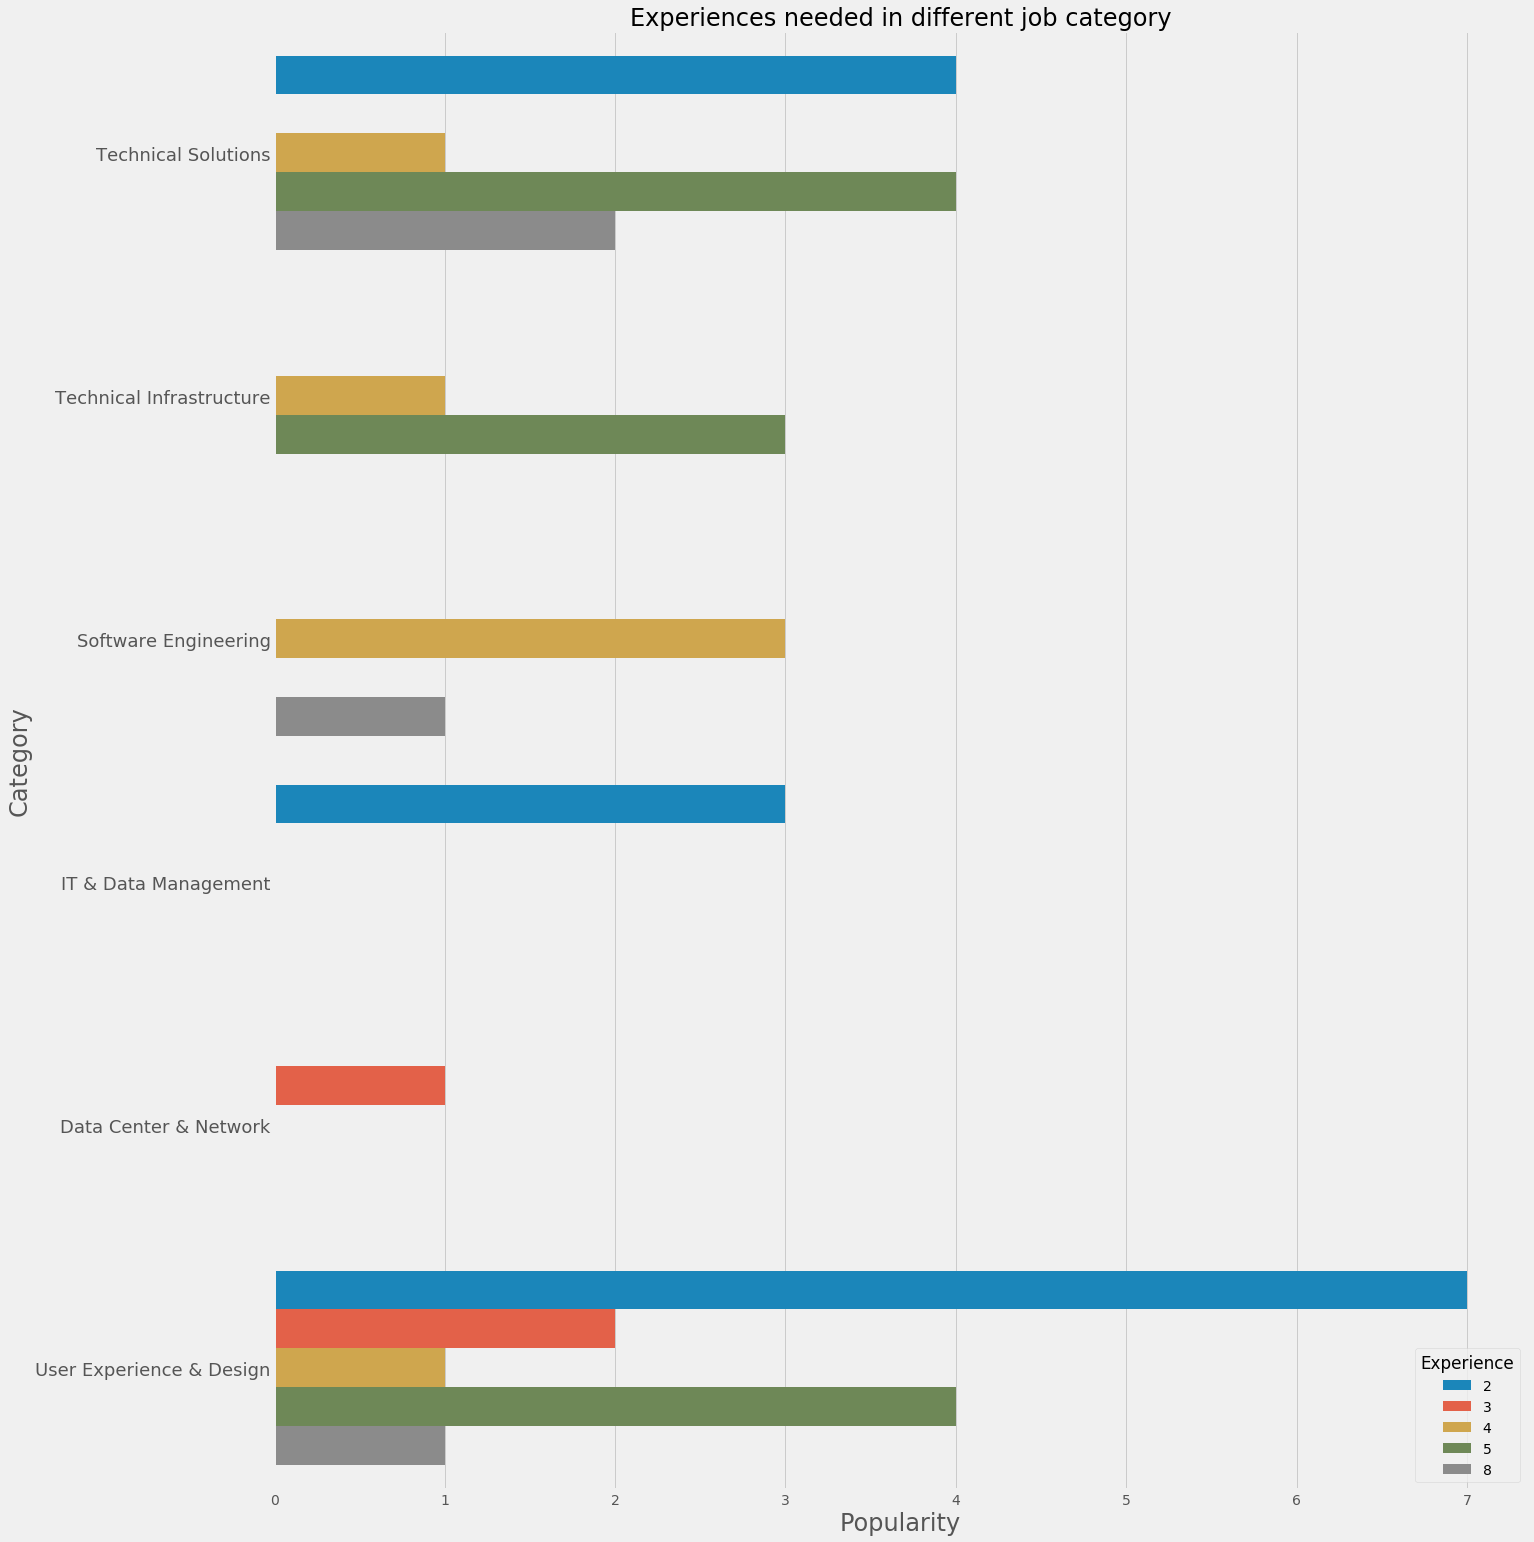

In [37]:
df_google['Experience'] = df_google['Preferred_Qualifications'].str.extract(r'([0-9]+) year')
dff = df_google[['Experience','Category']]
dff = dff.dropna()
dff.Experience.value_counts().iloc[:10].sort_values()
indexNames = dff[(dff['Category'] != 'Technical Solutions') & (dff['Category'] != 'Technical Infrastructure') & 
                (dff['Category'] != 'Software Engineering') & (dff['Category'] != 'IT & Data Management') & 
                (dff['Category'] != 'Data Center & Network') & (dff['Category'] != 'User Experience & Design')].index
dff.drop(indexNames , inplace=True)

plt.figure(figsize=(20,25))
plt.title('Experiences needed in different job category', fontsize=24)
sns.countplot(y='Category', hue='Experience', data=dff, hue_order=dff.Experience.value_counts().iloc[:5].index.sort_values())
plt.yticks(fontsize=18)
plt.xlabel('Popularity', fontsize=24)
plt.ylabel('Category', fontsize=24)
plt.show()

In [38]:
skills_1 = ['SDN', 'Android', 'Cloud', 'Machine Learning', 'Front-end', 'Back-end', 'Test', 'Deep Learning', 
           'Video', 'Image', 'Distributed Systems', 'User Interface', 'Virtualization', 'Linux', 'Big Data',
           'SaaS', 'PaaS', 'IaaS', 'IOS', 'VPN', 'Chrome', 'Unix', 'Database', 'Visualization', 'Artificial Intelligence',
           'Security', 'GPU programming', 'Container Management', 'Web Development', 'Infrastructure',
           'Advisory Program', 'Data Mining', 'Statistic Analysis', 'Commerce Engine', 'AutoCAD', 'AWS', 'RPM Packaging',
           'AJAX', 'React', 'Kafka', 'Natural Language Processing', 'Embedded', 'Git', 'Dynamo DB', 'Server-less', 'ElasticSearch',
           'API', 'Audio', 'TCP/IP', 'MapReduce', 'Speech Enhancement', 'Data Analytics', 'TensorFlow', 
           'Scikit-Learn', 'FPGA', 'Verilog', 'Web Technology', 'Quantitative Analysis', 'ML', 'Unity', 'Angular', 'Vue',
           'Compiler', 'LLVM', 'GCC', 'Computer Vision', 'NLP', 'AR/VR', 'Server', 'Client', 'Game',
           'Neural Network']
#lower case
skills_2 = [i.lower() for i in skills_1]

skills = {}
for skill in skills_1:
    count = df_google['Preferred_Qualifications'].str.contains(skill).sum()
    skills[skill] = count
for skill in skills_2:
    count = df_google['Preferred_Qualifications'].str.contains(skill).sum()
    index = skills_2.index(skill)
    skills[skills_1[index]] += count

remove_list = []    
for skill in skills:
    if skills[skill] == 0:
        remove_list.append(skill)
for skill in remove_list:
    skills.pop(skill)

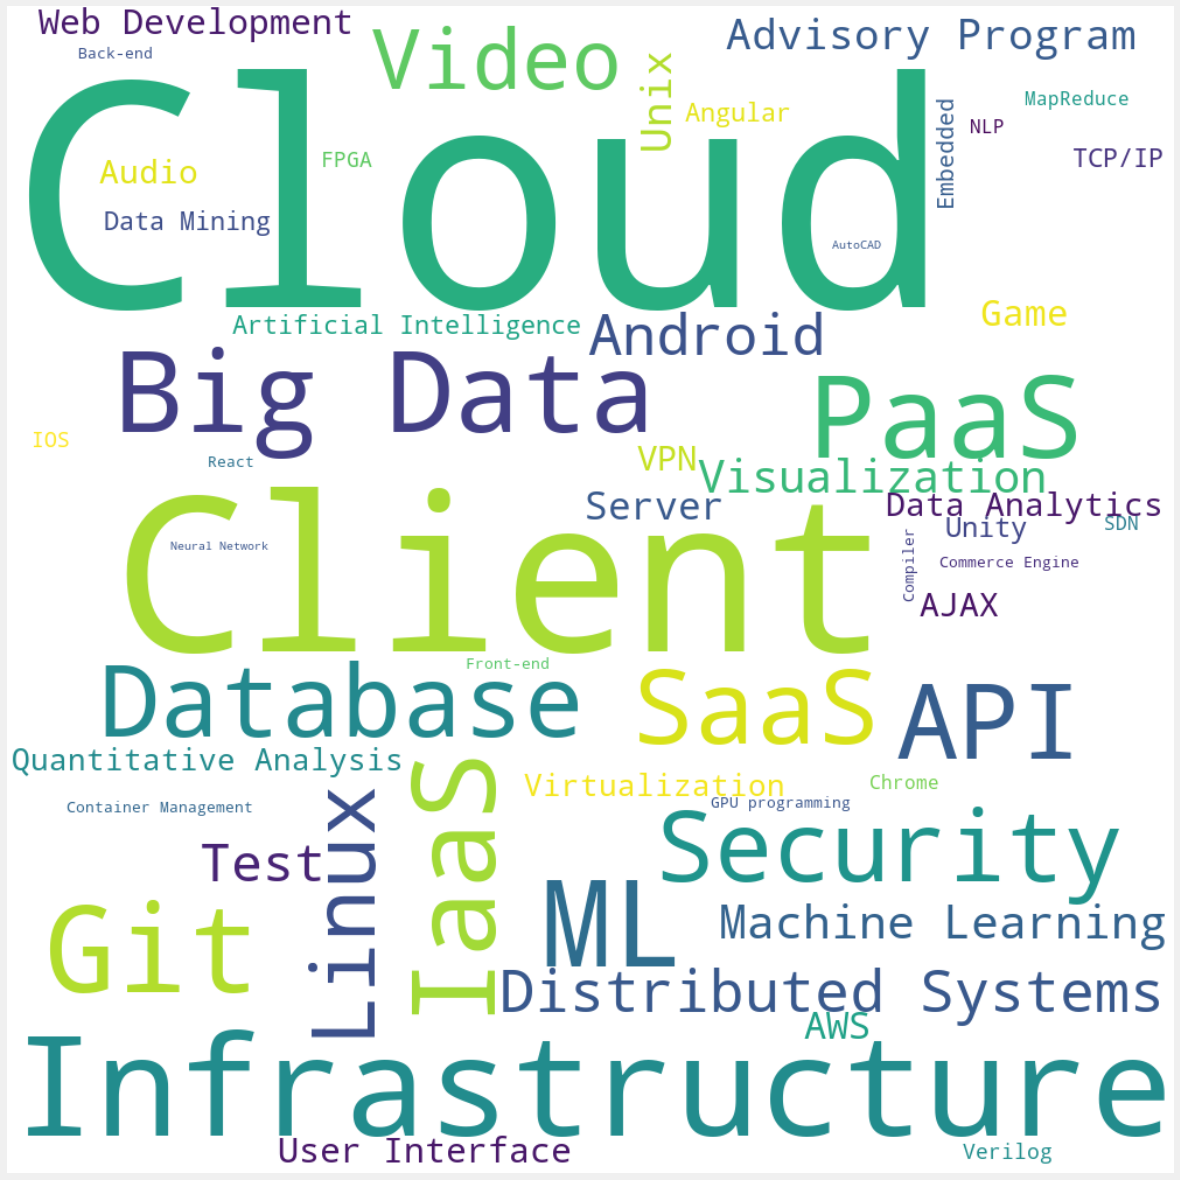

In [39]:
wordcloud = WordCloud(background_color="white",width=1000, height=1000, margin=0).generate_from_frequencies(skills)
# Display the generated image:
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.savefig("google_wordcloud.png")
plt.show()

In [40]:
def categories_dis_g(x):
    '''
    This function finds job categories distribution of google and subcategories of software engineer 
    '''
    assert isinstance(x,pd.core.frame.DataFrame)
    xS=x.loc[x['Category'].isin(['Technical Solutions','Software Engineering','Hardware Engineer'])]
    xF=x.loc[x['Category'].isin(['Finance'])]
    xSA=x.loc[x['Category'].isin(['Sales & Account Management'])]
    cat={'Software and Hardware Engineering':0,'Finance':0,'Sales and Account Management':0}
    
    cat['Software and Hardware Engineering']=xS.shape[0]
    cat['Sales and Account Management']= xF.shape[0] 
    cat['Finance']=xSA.shape[0]
 
    cat['Cloud Engineering']=x['Category'].str.contains('Cloud').sum()    
    cat['Big Data']=x['Category'].str.contains('Big Data|Data').sum()    
    
    cat['Network Engineer']=x['Title'].str.contains('Network').sum()   
    cat['Machine Learning Engineer']=x['Title'].str.contains('Machine Learning|Learning|Deep Learning').sum()   
    cat['Research Scientist']=x['Title'].str.contains('Research Intern').sum()
    norm=sum(list(cat.values()))

    normalized_dic={nam[0]:nam[1]/norm for nam in cat.items()}
    res = sorted(normalized_dic.items(), key=lambda x: x[1], reverse=True)
    normalized_dic={nam[0]:nam[1] for nam in res}
  
    return normalized_dic

def google_job_graph(amazon):
    ''' 
    This file generates pie chart of all job cateogires of Google as well gives bar chart of subcateogires of software engineer
    I used str.contains to generate subcateogries of software developer engineer
    parameter:google is dataframe containing job categories 
    type: dataframe
    '''
    assert isinstance(amazon,pd.core.frame.DataFrame)
 
    '''
    Visualization of graphs
    '''
    # style choice
    plt.style.use('fivethirtyeight')

    # make figure and assign axis objects
    fig = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    ratios = [.33, .15, .10,0.24,0.14,0.04]
    labels = ['Software Engineer', 'Technician', 'Finance','Marketing and Communication','Sales &Account Manager','Other']
    explode=[0.1,0,0,0,0,0]


    # pie chart parameters
 
    # rotate so that first wedge is split by the x-axis
    angle = -180*ratios[0]
    angle = -180*ratios[0]
    wedge_a,labels_a,auto=ax1.pie(ratios, autopct='%1.1f%%', startangle=angle, explode=explode,colors=['r','c','m','cadetblue','olive','g'],labels=labels )
    plt.setp(labels_a,weight='bold',fontsize=11)   
    # bar chart parameters                                                                                                                                                                                                                                                nnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnnn nnn nnn                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   )
    xpos = 0
    bottom = 0
    ratios = [.25, 0.22,.14, .07,0.06,0.26][::-1]
    width = .2
    colors = ['#ffcc99','#99ff99','c','b','m','y'][::-1]


    for j in range(len(ratios)):
        height = ratios[j]
        ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
        ypos = bottom + ax2.patches[j].get_height()/2
        bottom += height
        ax2.text(xpos,ypos, "%d%%" %(ax2.patches[j].get_height()*100), ha='center')

    plt.title('Types of Software Engineer',weight='bold')
    plt.legend(('Big Data' , 'Cloud Engineer','ML Engineer','Web Engineer','Network Engineer', 'Other'),fontsize=16,loc='upper right')
    plt.axis('off')
    plt.xlim(-2.5*width, 2.5*width)


    # use ConnectionPatch to draw lines between the two plots
    # get the wedge data for the first group
    theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
    center, r = ax1.patches[0].center, ax1.patches[0].r
    bar_height = sum([item.get_height() for item in ax2.patches])
    x = r*np.cos(math.pi/180*theta2)+center[0]
    y = np.sin(math.pi/180*theta2)+center[1]
    con = ConnectionPatch(xyA=(-width/2,bar_height), xyB=(x,y), coordsA="data", coordsB="data", axesA=ax2, axesB=ax1)
    con.set_color([0,0,0])
    con.set_linewidth(4)
    ax2.add_artist(con)

    x = r*np.cos(math.pi/180*theta1)+center[0]
    y = np.sin(math.pi/180*theta1)+center[1]
    con = ConnectionPatch(xyA=(-width/2,0), xyB=(x,y),
    coordsA="data", coordsB="data", axesA=ax2, axesB=ax1)
    con.set_color([0,0,0])
    ax2.add_artist(con)
    con.set_linewidth(4)

    plt.show()

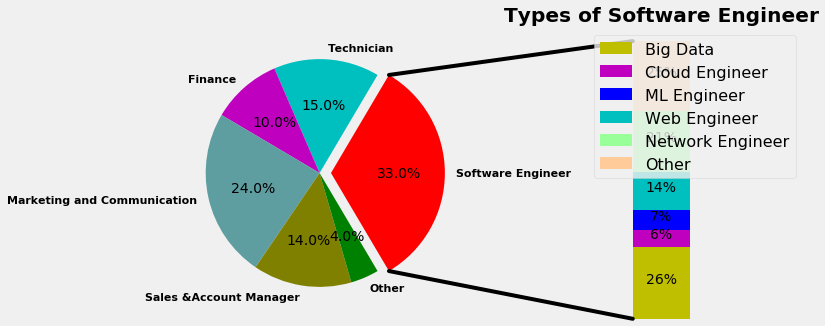

In [41]:
google_job_graph(df_google)

In [42]:
# use the 'ggplot'， an art style of matplotlib
plt.style.use("ggplot")

df_amazon = df_amazon.dropna(axis=0, how='any')
# clear the rows with NaN. axis=0 means delete the NaN, depending on the rows, axis=1 means columns
# 'any' means rows with NaN, 'all' means rows whose elements all are NaN

# get all the data from ['Location']
all_location=df_amazon['location'].value_counts()

# only get the location data which contains 'United States'
US=df_amazon[df_amazon['location'].str.contains("US")]
US_SDE=US[US['Title'].str.contains("Software")]
# Notice the difference between str.contains and isin
# Pick up Top10 US cities
US_city=(US['location'].apply(lambda x : x.split(',')[-1])).value_counts()[:10]
US_SDE_city=(US_SDE['location'].apply(lambda x : x.split(',')[-1])).value_counts()[:10]
print(US_city)

# Only keep the 'country' for location
df_amazon['country']=df_amazon['location'].apply(lambda x: x.split(',')[0])
# Use full name to replace the abbreviation
df_amazon['country']=df_amazon['country'].replace(['CA','IN','UK','IE','DE','IL','CN',"PL",'RO','ZA','ES'],['Canada','India','United Kingdom','Ireland','Germany','Israel','China','Poland','Romania','South Africa','Spain'])
f_SDE=df_amazon[df_amazon['Title'].str.contains("Software")]
# Pick up Top10 foreign countries
fc=df_amazon['country'].value_counts()[1:11]
fc_SDE=f_SDE['country'].value_counts()[1:11]
print(fc)


 Seattle            295
 Palo Alto           22
 Herndon             15
 Sunnyvale           15
 Cambridge           15
 Austin              13
 Cupertino           13
 Bellevue            12
 East Palo Alto      11
 New York             7
Name: location, dtype: int64
Canada          23
India           16
Israel           6
Spain            5
Ireland          4
Germany          4
South Africa     3
China            3
AU               2
Romania          2
Name: country, dtype: int64


WA    307
CA     73
MA     19
VA     16
TX     13
NY      7
CO      3
OR      3
NJ      1
Name: location, dtype: int64


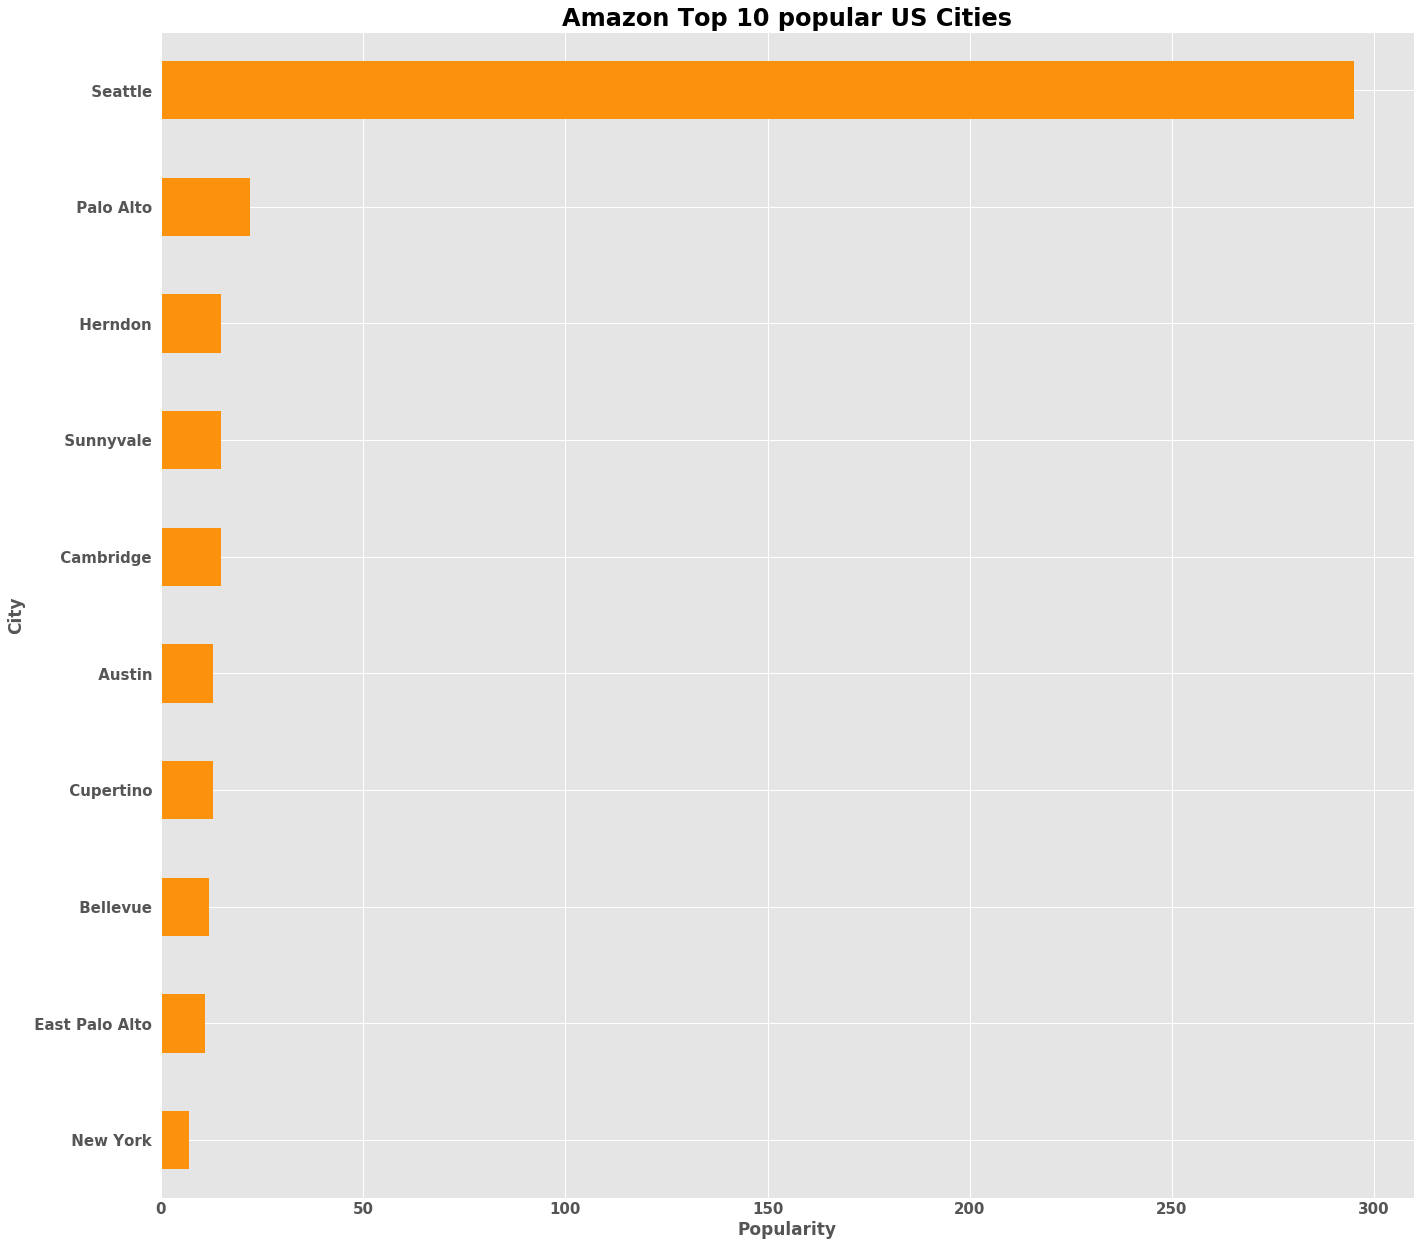

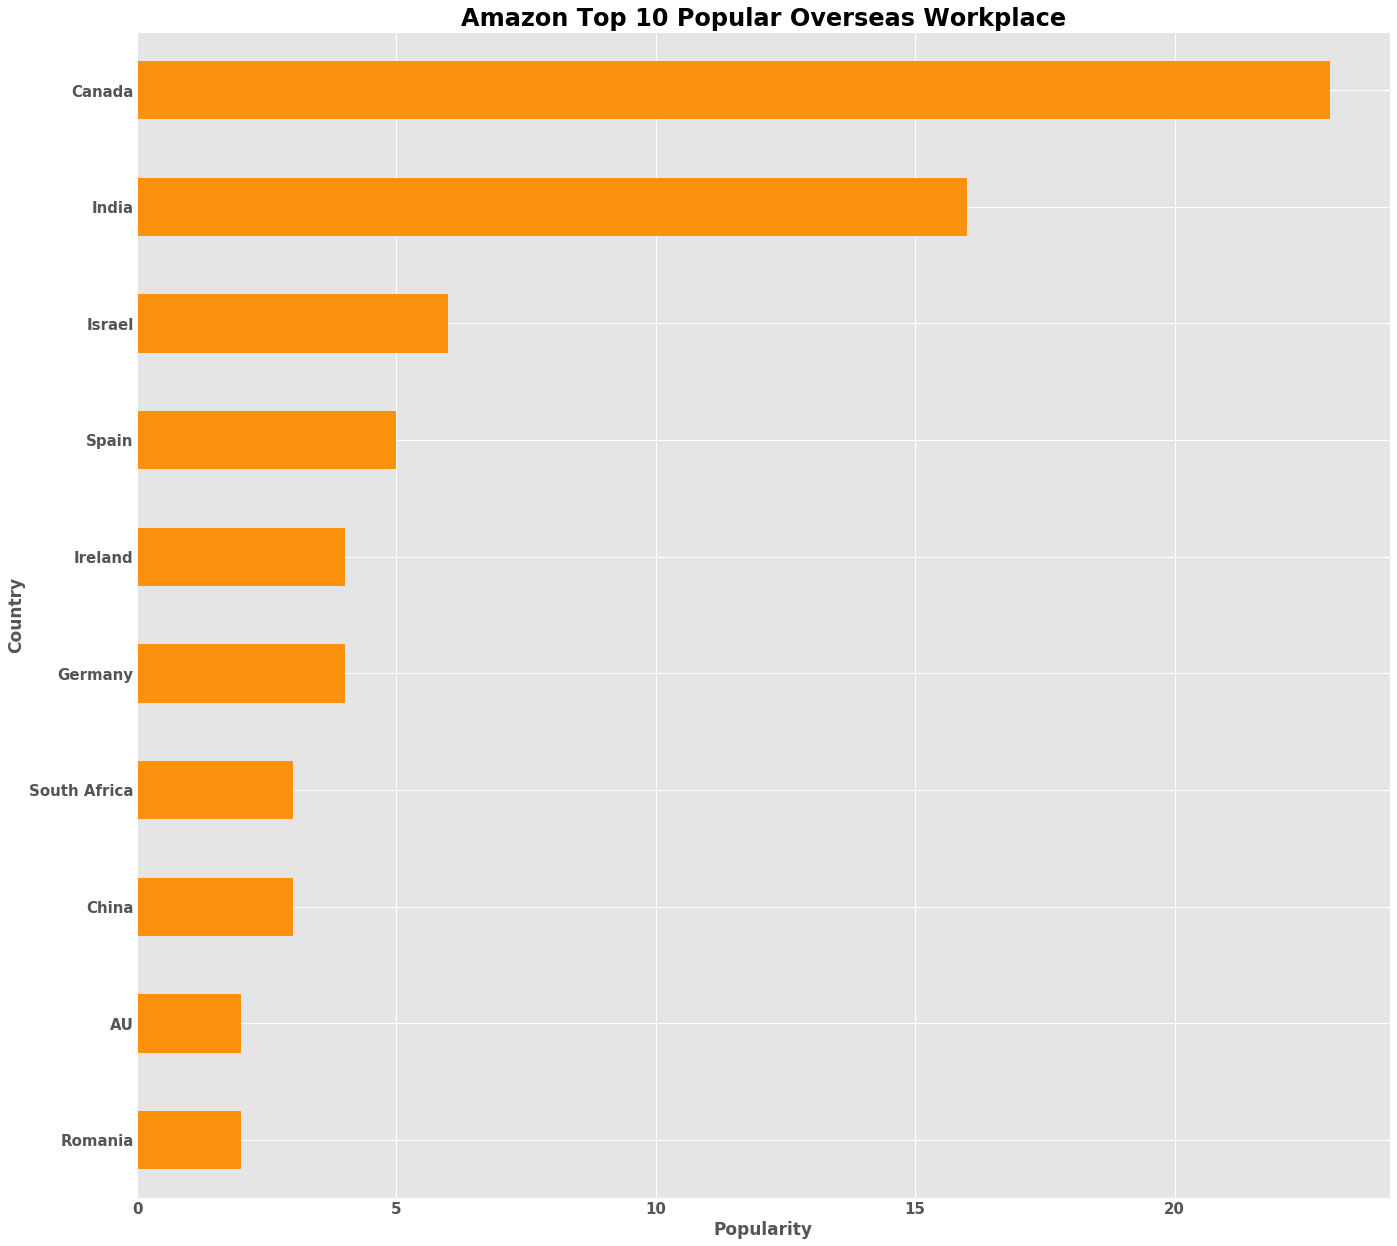

In [43]:
def histogram_h(data_name,tittle,xlabel='Popularity',ylabel='Country'):
    '''
    :param data_name: pd.Series, data which need to show the graphs
    :param tittle: str, name plot tittle
    :param xlabel: str, name of xlabel
    :param ylabel: srt, name of ylabel
    :return:
    '''

    assert isinstance(tittle,str)
    assert isinstance(xlabel,str)
    assert isinstance(ylabel,str)
    # plot.bar is vertical histogram; plot.barh is horizontal histogram
    # [::-1], make the order is from big ro small
    data_name = data_name[::-1]
    data_name.plot.barh(figsize=(20, 20),color='#fc910d')
    # add a title, and set the size of plot
    plt.title(tittle, fontsize=24, weight='bold')
    plt.xlabel(xlabel, fontsize=17,weight='bold')
    plt.ylabel(ylabel, fontsize=17,weight='bold')
    # set the fontsize for mark of a,y axis
    plt.tick_params(labelsize=15)
    plt.xticks(weight='bold')
    plt.yticks(weight='bold')
    # finally show the plot
    plt.show()

# Pick up the State in US
US_state=(US['location'].apply(lambda x: x.split(',')[1][1:])).value_counts()
print(US_state)
state_data = US_state.to_frame()
state_data = pd.DataFrame(state_data.reset_index())
state_data.columns = ["state", "freq"]

def map(data_name):
    '''
    :param data_name: input, pd.DataFrame
    :return: map
    '''

    fig = go.Figure(data=go.Choropleth(
        locations=state_data['state'],  # Spatial coordinates
        z=state_data['freq'].astype(float),  # Data to be color-coded
        locationmode='USA-states',  # set of locations match entries in `locations`
        colorscale='Reds',
        colorbar_title="# of jobs",
        zmax=50,
        zmid=10,
        zmin=0,))

    fig.update_layout(
        title_text='Amazon Jobs Map',
        geo_scope='usa',  # limite map scope to USA,
        font=dict(size=20)
    )


    fig.update_layout(
        title={
            'x': 0.5,
            'y': 0.9,
            # 'xanchor': 'auto',
            # 'yanchor': 'auto'
        }
    )

    fig.show()

if __name__ == '__main__':
    histogram_h(US_city,tittle='Amazon Top 10 popular US Cities', ylabel='City')
    # histogram_h(US_SDE_city, tittle='Amazon Top 10 popular US Cities for Software', ylabel='City')
    histogram_h(fc,tittle='Amazon Top 10 Popular Overseas Workplace')
    # histogram_h(fc_SDE, tittle='Amazon Top 10 Popular Overseas Workplace for Software')
    map(state_data)

In [44]:
df_facebook1 = df_facebook1.dropna(axis=0, how='any')
# clear the rows with NaN. axis=0 means delete the NaN, depending on the rows, axis=1 means columns
# 'any' means rows with NaN, 'all' means rows whose elements all are NaN

# get all the data from ['Location']
all_location=df_facebook1['Location'].value_counts()

# only get the location data which contains 'United States'
US=df_facebook1[df_facebook1['Location'].str.contains(",")]
# Notice the difference between str.contains and isin
# If want to delete the rows including specific words, df[~df['Location'].str.contains("United\sStates")]

# Pick up Top10 US cities
US_city=(US['Location'].apply(lambda x : x.split(',')[0])).value_counts()[:10]

# Pick up the State in US
US_state=(US['Location'].apply(lambda x: x.split(',')[1][1:])).value_counts()
# print(US_state)
# print(US_city)

Overseas= df_facebook1.drop(US.index)
country=Overseas['Location'].value_counts()
print(country)

London            191
United Kingdom    191
Ireland           167
Dublin            145
Singapore         111
                 ... 
Johannesburg        1
Kuala Lumpur        1
South Africa        1
Malaysia            1
Copenhagen          1
Name: Location, Length: 70, dtype: int64


In [45]:
# Draw Horizontal Histogram Graph
def histogram_h(data_name,tittle,xlabel='Popularity',ylabel='Country'):
    '''
    :param data_name: input, the pd.Series
    :param tittle:
    :param xlabel:
    :param ylabel:
    :return:
    '''
    assert isinstance(tittle,str)
    assert isinstance(xlabel,str)
    assert isinstance(ylabel,str)
    # plot.bar is vertical histogram; plot.barh is horizontal histogram
    data_name = data_name[::-1]
    data_name.plot.barh(figsize=(20, 20), color='#436EEE')

    # add a title, and set the size of plot
    plt.title(tittle, fontsize=24, weight='bold')
    plt.xlabel(xlabel, fontsize=17, weight='bold')
    plt.ylabel(ylabel, fontsize=17, weight='bold')
    # set the fontsize for mark of a,y axis
    plt.tick_params(labelsize=15)
    plt.xticks(weight='bold')
    plt.yticks(weight='bold')
    # finally show the plot
    plt.show()



state_data = US_state.to_frame()
state_data = pd.DataFrame(state_data.reset_index())
state_data.columns = ["state", "freq"]

def map(data_name):
    '''
    :param data_name: input, pd.DataFrame
    :return: map
    '''

    fig = go.Figure(data=go.Choropleth(
        locations=state_data['state'],  # Spatial coordinates
        z=state_data['freq'].astype(float),  # Data to be color-coded
        locationmode='USA-states',  # set of locations match entries in `locations`
        colorscale='blues',
        colorbar_title="# of jobs",
        zmax=50,
        zmid=10,
        zmin=0,))

    fig.update_layout(
        title_text='Facebook Jobs',
        font=dict(size=20),
        geo_scope='usa',  # limite map scope to USA,
        showlegend=True,
    )

    fig.update_layout(
        title={
            'text': 'Facebook Jobs Map',
            'x': 0.5,
            'y': 0.9,
            # 'xanchor': 'auto',
            # 'yanchor': 'auto'
        }
    )
    fig.show()

if __name__ == '__main__':
    # histogram_h(US_city,tittle='Facebook Top 10 popular US Cities', ylabel='City')
    map(state_data)
    #
    # over={'United Kingdom':191,'Ireland':167,'Singapore':111,'Israel':40,'India':40,'Germany':31,'Brazil':30,'China':25,'Canada':19,'France':17}
    # overssea= pd.Series(over)
    # histogram_h(overssea, tittle='Facebook Top 10 Popular Overseas Workplace')

In [46]:
df_google = df_google.dropna(axis=0, how='any')
# clear the rows with NaN. axis=0 means delete the NaN, depending on the rows, axis=1 means columns
# 'any' means rows with NaN, 'all' means rows whose elements all are NaN

# get all the data from ['Location']
all_location=df_google['Location'].value_counts()
# print(all_location)

# only get the location data which contains 'United States'
US=df_google[df_google['Location'].str.contains("United\sStates")]
# Notice the difference between str.contains and isin
# If want to delete the rows including specific words, df[~df['Location'].str.contains("United\sStates")]
US_Management=US[US['Category'].str.contains('Management')]

# Pick up Top10 US cities
US_city=(US['Location'].apply(lambda x : x.split(',')[0])).value_counts()[:10]
US_Management_city=(US_Management['Location'].apply(lambda x : x.split(',')[0])).value_counts()[:10]
# Pick up the State in US
US_state=(US['Location'].apply(lambda x: x.split(',')[1][1:])).value_counts()
print(US_state)
print(US_city)

# only keep the 'country' for location
df_google['country']=df_google['Location'].apply(lambda x: x.split(',')[-1])
f_M=df_google[df_google['Category'].str.contains('Management')]
# Pick up Top10 foreign countries
fc=df_google['country'].value_counts()[1:11]
fc_M=f_M['country'].value_counts()[1:11]
# print(fc)


CA    86
NY    17
WA    16
CO     3
TX     3
PA     2
IL     2
UT     1
OH     1
OR     1
MI     1
MA     1
MN     1
DC     1
Name: Location, dtype: int64
Sunnyvale        37
Mountain View    36
New York         17
Seattle          10
San Francisco     8
Kirkland          6
Boulder           3
Pittsburgh        2
Austin            2
San Bruno         2
Name: Location, dtype: int64


In [47]:
# Draw Horizontal Histogram Graph
def histogram_h(data_name,tittle,xlabel='Popularity',ylabel='Country'):
    '''
    :param data_name: input, the pd.Series
    :param tittle:
    :param xlabel:
    :param ylabel:
    :return:
    '''
    assert isinstance(tittle,str)
    assert isinstance(xlabel,str)
    assert isinstance(ylabel,str)
    # plot.bar is vertical histogram; plot.barh is horizontal histogram
    data_name = data_name[::-1]
    data_name.plot.barh(figsize=(20, 20), color='#32CD32')

    # add a title, and set the size of plot
    plt.title(tittle, fontsize=24, weight='bold')
    plt.xlabel(xlabel, fontsize=17, weight='bold')
    plt.ylabel(ylabel, fontsize=17, weight='bold')
    # set the fontsize for mark of a,y axis
    plt.tick_params(labelsize=15)
    plt.xticks(weight='bold')
    plt.yticks(weight='bold')
    # finally show the plot
    plt.show()



state_data = US_state.to_frame()
state_data = pd.DataFrame(state_data.reset_index())
state_data.columns = ["state", "freq"]

def map(data_name):
    '''
    :param data_name: input, pd.DataFrame
    :return: map
    '''

    fig = go.Figure(data=go.Choropleth(
        locations=state_data['state'],  # Spatial coordinates
        z=state_data['freq'].astype(float),  # Data to be color-coded
        locationmode='USA-states',  # set of locations match entries in `locations`
        colorscale='Greens',
        colorbar_title="# of jobs",
        zmax=50,
        zmid=10,
        zmin=0,))

    fig.update_layout(
        title_text='Google Jobs',
        font=dict(size=20),
        geo_scope='usa',  # limite map scope to USA,
        showlegend=True,
    )

    fig.update_layout(
        title={
            'text': 'Google Jobs Map',
            'x': 0.5,
            'y': 0.9,
            # 'xanchor': 'auto',
            # 'yanchor': 'auto'
        }
    )
    fig.show()

if __name__ == '__main__':
    # histogram_h(US_city,tittle='Google Top 10 popular US Cities', ylabel='City')
    # histogram_h(US_Management_city, tittle='Google Top 10 Popular US Cities for Management',ylabel='City')
    # histogram_h(fc,tittle='Google Top 10 Popular Overseas Workplace')
    # histogram_h(fc_M, tittle='Google Top 10 Popular Overseas Workplace for Management')
    map(state_data)

In [48]:
df_facebook1 = df_facebook1.dropna(axis=0, how='any')
# clear the rows with NaN. axis=0 means delete the NaN, depending on the rows, axis=1 means columns
# 'any' means rows with NaN, 'all' means rows whose elements all are NaN

# get all the data from ['Title']
all_jobs = df_facebook1['Title'].value_counts()
print(all_jobs)

all_category = df_facebook1['Category'].value_counts()
print(all_category)
# the following code has three functions:
# 1. use 'Software Engineer or Manager' to replace all index which includes 'software', and count appearance times j
# 'Software Engineer or Manager' must Top1 job
# 2. use 'Others' to replace all left index (except Top4), and count appearance times
# 3. count Top2-4 obs

# SD=df.loc[df['Category'].str.contains("Software")]
SDE= df_facebook1[df_facebook1['Title'].str.contains("Software") & df_facebook1['Title'].str.contains("Engineer")]
#
SDM = df_facebook1[df_facebook1['Title'].str.contains("Software") & df_facebook1['Title'].str.contains("Manager")]
#
AR = df_facebook1[df_facebook1['Category'].str.contains("AR|VR")]
Marketing = df_facebook1.loc[df_facebook1['Category'].str.contains('Marketing')]

HR=df_facebook1.loc[df_facebook1['Title'].str.contains("HR|Recruiting|Recruiter|Sourcer")]
#
Data = df_facebook1[df_facebook1['Title'].str.contains("Data")]
#
print(Data.index)

all = pd.concat([SDE,AR,Marketing,HR,Data], axis=1)
other=df_facebook1.drop(all.index)

pop=dict()
# pop['SD']=len(SD)
pop['HR']=len(HR)
pop['Software Engineer']= len(SDE)
pop['AR/VR Engineer'] = len(AR)
pop['Data Analyst'] = len(Data)
pop['Sales & Marketing']=len(Marketing)
pop['Others']=len(other)

popularity = pd.Series(pop)
popularity = popularity.sort_values(ascending=False)
print(popularity)


Geo Program Manager, Global Data Center Connectivity     15
Critical Facility Engineer                               15
Product Designer                                         15
Client Solutions Manager                                 13
Enterprise Support Tech                                  13
                                                         ..
Industry Manager, Global Accounts                         1
Counsel, Real Estate                                      1
Compliance Risk Management Leader, Calibra                1
Director, Data Center Operations                          1
Director, Product Management                              1
Name: Title, Length: 2082, dtype: int64
AR/VR                              355
People & Recruiting                195
Sales & Marketing                  195
Infrastructure                     184
Analytics                          168
                                  ... 
Sourcing Operations Engineering      2
Corporate Development      

Others               2344
Sales & Marketing     403
AR/VR Engineer        355
Data Analyst          319
Software Engineer     300
HR                    241
dtype: int64


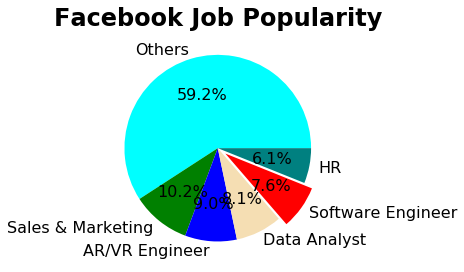

In [49]:
def pie_chart_1(data_name,title,color):
    '''
    :param data_name: pd.Series, the data which need to be showed
    :param title: str, name of graph tittle
    :param color: list filled with str, the color of slices in pie chart
    :return: a pir chart
    '''

    assert isinstance(title, str)

    explode=[0,0,0,0,0.1, 0]

    plt.pie(data_name,labels=popularity.index, autopct='%1.1f%%',explode=explode,textprops={'fontsize':16},colors=color)

    # add a title, and set the size of plot
    plt.title(title, fontsize=24,weight='bold')

    # plt.legend(labels,loc="upper right",bbox_to_anchor=(1.35,0.9),fontsize=18)
    # finally show the plot
    plt.show()

if __name__ == '__main__':
    # pie_chart(no_SDE,title='Amazon Top5 Popular Job')
    print(popularity)
    pie_chart_1(popularity, title='Facebook Job Popularity',color = ['cyan','green','blue','wheat','red','teal'])

In [50]:
df_google = df_google.dropna(axis=0, how='any')
# clear the rows with NaN. axis=0 means delete the NaN, depending on the rows, axis=1 means columns
# 'any' means rows with NaN, 'all' means rows whose elements all are NaN

# get all the data from ['Category']
all_category=df_google['Category'].value_counts()
Top5=all_category[:4]
left=all_category[5:]
Top5['Software Engineer'] = all_category['Software Engineering']
Top5['Others']=0
for i in left.index:
    Top5['Others']+=left[i]
Top5['Others']=Top5['Others']- Top5['Software Engineer']
Top5['Software Engineer'] = Top5['Software Engineer'] + 981

Top5.index=['Sales & Account Manager', 'Marketing & Communications', 'Finance', 'Technician', 'Software Engineer', 'Others']
Top5=Top5.sort_values(ascending=False)
print(Top5)

Software Engineer             987
Others                         89
Sales & Account Manager        20
Finance                        18
Marketing & Communications     18
Technician                     17
Name: Category, dtype: int64


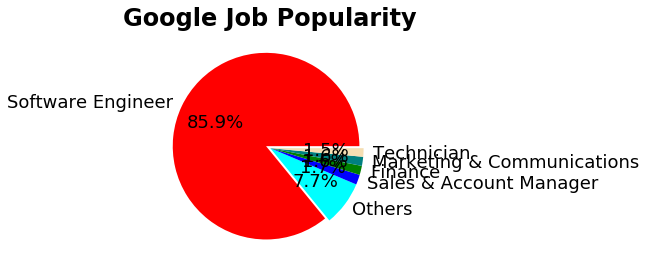

In [51]:
def pie_chart(data_name,title,color):
    '''
    :param data_name: pd.Series, the data which need to be showed
    :param title: str, name of graph tittle
    :param color: list filled with str, the color of slices in pie chart
    :return: a pir chart
    '''
    assert isinstance(title, str)
    # explode, explode one slice of pie chart
    explode=[0.05,0,0,0,0,0]

    plt.pie(data_name,labels=Top5.index, autopct='%1.1f%%',explode=explode,textprops={'fontsize':18},colors=color)
    # data_name is the values of series，data_name.index is the index of series

    # add a title, and set the size of plot
    plt.title(title, fontsize=24,weight='bold')

    # finally show the plot
    plt.show()

if __name__ == '__main__':
    pie_chart(Top5,title='Google Job Popularity',color = ['red','cyan','blue','green','teal','wheat'])

In [52]:
df_amazon = df_amazon.dropna(axis=0, how='any')
# clear the rows with NaN. axis=0 means delete the NaN, depending on the rows, axis=1 means columns
# 'any' means rows with NaN, 'all' means rows whose elements all are NaN

# get all the data from ['Title']
all_jobs = df_amazon['Title'].value_counts()

# the following code has three functions:
# 1. use 'Software Engineer or Manager' to replace all index which includes 'software', and count appearance times j
# 'Software Engineer or Manager' must Top1 job
# 2. use 'Others' to replace all left index (except Top4), and count appearance times
# 3. count Top2-4 obs

SDE= df_amazon[df_amazon['Title'].str.contains("Software") & df_amazon['Title'].str.contains("Engineer")]

SDM = df_amazon[df_amazon['Title'].str.contains("Software") & df_amazon['Title'].str.contains("Manager")]

Web = df_amazon[df_amazon['Title'].str.contains("Web")]

Data = df_amazon[df_amazon['Title'].str.contains("Data")]

pop=dict()
pop['Software Engineer']= len(SDE)
pop['Software Manager'] = len(SDM)
pop['Web Engineer'] = len(Web)
pop['Data Analyst'] = len(Data)
pop['Others'] = len(df)-len(SDE)-len(SDM)-len(Web)

popularity = pd.Series(pop)
popularity = popularity.sort_values(ascending=False)
print(popularity)

Software Engineer    341
Software Manager      80
Web Engineer          17
Data Analyst          10
Others              -425
dtype: int64


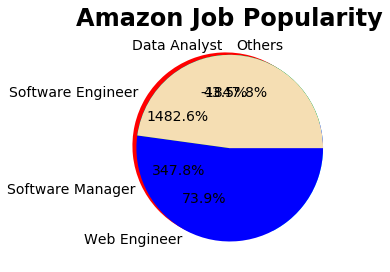

In [53]:
def pie_chart(data_name,title):
    assert isinstance(title, str)
    explode = [0.05, 0, 0, 0, 0]
    plt.pie(data_name,explode=explode,labels=popularity.index)
    # add a title, and set the size of plot
    plt.title(title, fontsize=24)
    # add 图例 and set its format
    percent = 100. * no_SDE / no_SDE.sum()
    labels = ['{0} - {1} - {2:2.2f} %'.format(i, j, h) for i, j, h in zip(no_SDE.index, no_SDE, percent)]
    plt.legend(labels,loc="upper right",bbox_to_anchor=(1.35,0.95),fontsize=18)
    # bbox_to_anchor,is the distance to left-bottom corner
    plt.tight_layout()
    # finally show the plot
    plt.show()

def pie_chart_1(data_name,title,color):
    '''
    :param data_name: pd.Series, the data which need to be showed
    :param title: str, name of graph tittle
    :param color: list filled with str, the color of slices in pie chart
    :return: a pir chart
    '''

    assert isinstance(title, str)
    # explode, explode one slice of pie chart
    explode=[0.05,0,0,0,0]

    plt.pie(data_name,labels=popularity.index, autopct='%1.1f%%',explode=explode,textprops={'fontsize':14},colors=color)

    # add a title, and set the size of plot
    plt.title(title, fontsize=24,weight='bold')
    # add legend, and set the format
    labels = ['{0} - {1}'.format(i,j) for i,j in zip(data_name.index, data_name)]
    # plt.legend(labels,loc="upper right",bbox_to_anchor=(1.35,0.9),fontsize=18)
    # finally show the plot
    plt.show()

if __name__ == '__main__':
    # pie_chart(no_SDE,title='Amazon Top5 Popular Job')
    pie_chart_1(popularity, title='Amazon Job Popularity',color = ['red','cyan','blue','green','wheat'])